In [10]:
import os
from prepare_datasets_BERT import get_grnti1_2_BERT_dataframes, prepair_datasets, prepair_model,\
    prepair_compute_metrics

from train_test_BERT import train_save_bert, test_save_results
from TrainSettings import TrainSettings

n = 0 
base_name = "results_2//"

C:\Users\victo\AppData\Local\Temp\ipykernel_9384\3566550383.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df, df_test, n_classes, n_classes2 = get_grnti1_2_BERT_dataframes("..\\datasets\\base\\ru\\raw",
b'Skipping line 23708: expected 8 fields, saw 9\n'


Удаление элементов второго уровня, количство которых меньше 10
         id_publ                                              title  \
0   19.06-73.269  Некоторые аспекты изменения степных ландшафтов...   
1   19.01-24А.85  Подходы к повышению точности определения харак...   
2   19.06-66.105  Микроскопическое моделирование фазового поля п...   
3   19.06-14Б.10  МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...   
4  19.10-19Ж.456  Трехкомпонентная реакция Кастагноли-Кушмана 3-...   

                                             ref_txt  \
0  Предлагается результат анализа динамики некото...   
1  В статье представлены подходы к повышению точн...   
2  Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...   
3  Объектом исследования является проектирование ...   
4  Попытки использования 3-арилглутаконовых кисло...   

                                             kw_list   SUBJ     IPV  \
0  Урало-Заволжье\анализ динамики\ландшафты\нефте...  f3\e2   72\73   
1  метровый диапазон\обнаружени

100%|██████████| 31/31 [00:18<00:00,  1.67it/s]


Доля оставшихся элементов в тренировочном датасете:  0.9639257800521965


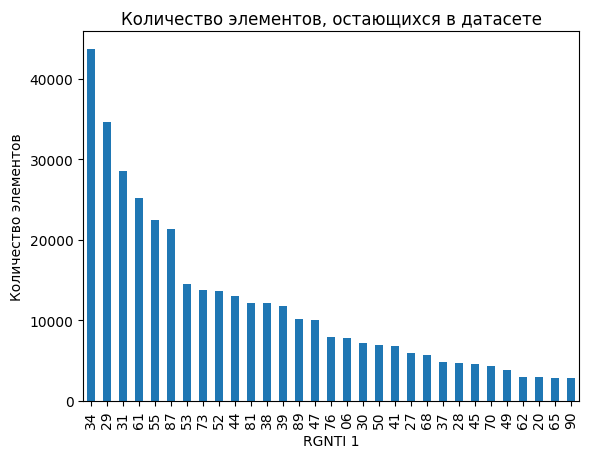

In [11]:
number_of_delteted_values = 16
minimal_number_of_elements_RGNTI2 = 10
minimal_number_of_words = 10
path_info_before_save = base_name + f"data_info_from_bert_level1\\"
if not os.path.exists(path_info_before_save):
    os.makedirs(path_info_before_save)
df, df_test, n_classes, n_classes2 = get_grnti1_2_BERT_dataframes("..\\datasets\\base\\ru\\raw", 
                                            number_of_delteted_values=number_of_delteted_values, 
                                minimal_number_of_elements_RGNTI2=minimal_number_of_elements_RGNTI2,
                                minimal_number_of_words=minimal_number_of_words,
                                dir_name=path_info_before_save)

In [3]:
df.head()

,id_publ,title,ref_txt,kw_list,SUBJ,IPV,RGNTI,eor,target,target_2,target_coded,target_coded2,text
0,19.06-73.269,Некоторые аспекты изменения степных ландшафтов...,Предлагается результат анализа динамики некото...,Урало-Заволжье\анализ динамики\ландшафты\нефте...,f3\e2,72\73,87.29.29\89.57.45\89.57.45,###,"[87, 89]","[89.57, 87.29]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Некоторые аспекты изменения степных ландшафтов...
1,19.01-24А.85,Подходы к повышению точности определения харак...,В статье представлены подходы к повышению точн...,метровый диапазон\обнаружение сигналов\подвижн...,e1,24А,47.05.11,###,[47],[47.05],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Подходы к повышению точности определения харак...
2,19.06-66.105,Микроскопическое моделирование фазового поля п...,Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...,"Ni[75]Al[15]Ti[10], моделирование выделения, к...",f1\f7,15И\66,53.49.05\81.33.07,###,"[81, 53]","[53.49, 81.33]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Микроскопическое моделирование фазового поля п...
3,19.06-14Б.10,МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...,Объектом исследования является проектирование ...,автоматизированное проектирование\обработка ме...,e9,14Б,55.13.15,###,[55],[55.13],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...
4,19.10-19Ж.456,Трехкомпонентная реакция Кастагноли-Кушмана 3-...,Попытки использования 3-арилглутаконовых кисло...,"3-арил-\4,6-диарил-1,6-дигидро-\Кастаньоли_-Ку...",f7,19Ж,31.21.27,###,[31],[31.21],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Трехкомпонентная реакция Кастагноли-Кушмана 3-...


In [4]:
len(df.iloc[0]['target_coded2'])

381

In [12]:
max_number_tokens = 512
pre_trained_model_name ='DeepPavlov/rubert-base-cased'
r = 16
lora_alpha = 32
lora_dropout = 0.05

In [6]:
train_dataset, validation_dataset, test_dataset,\
                                loss_fuction = prepair_datasets(df, df_test, n_classes,
                                                        max_number_tokens=max_number_tokens, 
                                                        pre_trained_model_name=pre_trained_model_name)

Веса для кажого класса:  [3.08225875 0.91159438 0.6692824  0.36217802 0.75331383 3.0913933
 0.31902617 3.24383428 3.17887286 1.86224712 2.34485259 0.42643643
 1.98744447 0.40644982 1.1520781  0.77089009 0.69740888 0.62806391
 0.20889944 2.07675511 0.66290249 1.15921114 0.90168819 1.27343407
 0.75370262 1.34795477 1.95185003 1.60374939 0.27563591 1.525673
 1.31707629]
Подготовка тренировочных данных:


100%|██████████| 226358/226358 [03:04<00:00, 1227.03it/s]


Подготовка валидационных данных:


100%|██████████| 56560/56560 [00:46<00:00, 1208.78it/s]


Подготовка тестовых данных:


100%|██████████| 166183/166183 [02:26<00:00, 1136.94it/s]


In [7]:
epoch=1
batch_size=8
weight_decay = 1e-6
warmup_steps = 10
fp16 = True
optim = "adamw_bnb_8bit"
dir_name = base_name + f"model bert lora level 1\\"
model = prepair_model(n_classes=n_classes, 
                      pre_trained_model_name=pre_trained_model_name,
                        r=r, lora_alpha=lora_alpha, 
                        lora_dropout=lora_dropout)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
from transformers import TrainingArguments, Trainer
import torch


In [9]:
torch.cuda.empty_cache()

In [10]:
model.to("cuda");

In [11]:
loss_fuction_for_multiclass_classification = loss_fuction
compute_metrics = prepair_compute_metrics(n_classes=n_classes)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fuction_for_multiclass_classification(logits, labels)

        return (loss, outputs) if return_outputs else loss
training_args = TrainingArguments(
    output_dir=dir_name,          
    num_train_epochs=epoch,
    per_device_train_batch_size = batch_size ,
    per_device_eval_batch_size = batch_size,
    warmup_steps=warmup_steps,
    logging_dir=dir_name,
    weight_decay=weight_decay,
    evaluation_strategy='epoch',
    save_strategy= "epoch",
    logging_strategy="steps",
    logging_steps = 100,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to='tensorboard',
    overwrite_output_dir = False,
    save_safetensors = False,
    fp16=fp16,
    optim = optim)

# Создание trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics
)


c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [12]:
#Обучение
trainer.train()

  0%|          | 0/28295 [00:00<?, ?it/s]c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
  0%|          | 101/28295 [00:15<1:08:29,  6.86it/s]

{'loss': 0.4197, 'grad_norm': 0.41798150539398193, 'learning_rate': 4.984090507336044e-05, 'epoch': 0.0}


  1%|          | 201/28295 [00:30<1:07:03,  6.98it/s]

{'loss': 0.1532, 'grad_norm': 0.23770427703857422, 'learning_rate': 4.9664132932649816e-05, 'epoch': 0.01}


  1%|          | 301/28295 [00:44<1:09:03,  6.76it/s]

{'loss': 0.144, 'grad_norm': 0.36427709460258484, 'learning_rate': 4.9487360791939194e-05, 'epoch': 0.01}


  1%|▏         | 401/28295 [00:59<1:08:55,  6.75it/s]

{'loss': 0.1382, 'grad_norm': 0.31025978922843933, 'learning_rate': 4.9310588651228565e-05, 'epoch': 0.01}


  2%|▏         | 501/28295 [01:14<1:11:44,  6.46it/s]

{'loss': 0.1416, 'grad_norm': 0.2691296339035034, 'learning_rate': 4.913381651051794e-05, 'epoch': 0.02}


  2%|▏         | 601/28295 [01:30<1:14:07,  6.23it/s]

{'loss': 0.1496, 'grad_norm': 0.46020641922950745, 'learning_rate': 4.895704436980732e-05, 'epoch': 0.02}


  2%|▏         | 701/28295 [01:46<1:17:41,  5.92it/s]

{'loss': 0.1468, 'grad_norm': 0.2796798050403595, 'learning_rate': 4.87802722290967e-05, 'epoch': 0.02}


  3%|▎         | 801/28295 [02:03<1:22:48,  5.53it/s]

{'loss': 0.1442, 'grad_norm': 0.2617455720901489, 'learning_rate': 4.8603500088386075e-05, 'epoch': 0.03}


  3%|▎         | 901/28295 [02:20<1:20:15,  5.69it/s]

{'loss': 0.1476, 'grad_norm': 0.3417617082595825, 'learning_rate': 4.8426727947675446e-05, 'epoch': 0.03}


  4%|▎         | 1001/28295 [02:38<1:21:44,  5.56it/s]

{'loss': 0.1403, 'grad_norm': 0.2534223198890686, 'learning_rate': 4.8249955806964824e-05, 'epoch': 0.04}


  4%|▍         | 1101/28295 [02:56<1:23:31,  5.43it/s]

{'loss': 0.1408, 'grad_norm': 0.22843044996261597, 'learning_rate': 4.80731836662542e-05, 'epoch': 0.04}


  4%|▍         | 1201/28295 [03:15<1:23:34,  5.40it/s]

{'loss': 0.1529, 'grad_norm': 0.42352381348609924, 'learning_rate': 4.789641152554358e-05, 'epoch': 0.04}


  5%|▍         | 1301/28295 [03:33<1:23:49,  5.37it/s]

{'loss': 0.1418, 'grad_norm': 0.44742533564567566, 'learning_rate': 4.7719639384832956e-05, 'epoch': 0.05}


  5%|▍         | 1401/28295 [03:52<1:24:52,  5.28it/s]

{'loss': 0.1408, 'grad_norm': 0.27100393176078796, 'learning_rate': 4.754286724412233e-05, 'epoch': 0.05}


  5%|▌         | 1501/28295 [04:10<1:23:50,  5.33it/s]

{'loss': 0.1448, 'grad_norm': 0.3808101415634155, 'learning_rate': 4.7366095103411705e-05, 'epoch': 0.05}


  6%|▌         | 1601/28295 [04:29<1:24:26,  5.27it/s]

{'loss': 0.1403, 'grad_norm': 0.43321457505226135, 'learning_rate': 4.718932296270108e-05, 'epoch': 0.06}


  6%|▌         | 1701/28295 [04:48<1:23:28,  5.31it/s]

{'loss': 0.1468, 'grad_norm': 0.23179218173027039, 'learning_rate': 4.701255082199046e-05, 'epoch': 0.06}


  6%|▋         | 1801/28295 [05:07<1:23:08,  5.31it/s]

{'loss': 0.1388, 'grad_norm': 0.3659912645816803, 'learning_rate': 4.683577868127984e-05, 'epoch': 0.06}


  7%|▋         | 1901/28295 [05:26<1:23:34,  5.26it/s]

{'loss': 0.1359, 'grad_norm': 0.47134721279144287, 'learning_rate': 4.665900654056921e-05, 'epoch': 0.07}


  7%|▋         | 2001/28295 [05:44<1:22:31,  5.31it/s]

{'loss': 0.1483, 'grad_norm': 0.2878757417201996, 'learning_rate': 4.648223439985858e-05, 'epoch': 0.07}


  7%|▋         | 2101/28295 [06:03<1:22:58,  5.26it/s]

{'loss': 0.1407, 'grad_norm': 0.1843479424715042, 'learning_rate': 4.630546225914796e-05, 'epoch': 0.07}


  8%|▊         | 2201/28295 [06:22<1:22:25,  5.28it/s]

{'loss': 0.129, 'grad_norm': 0.2811550796031952, 'learning_rate': 4.6128690118437334e-05, 'epoch': 0.08}


  8%|▊         | 2301/28295 [06:41<1:21:55,  5.29it/s]

{'loss': 0.1355, 'grad_norm': 0.42953723669052124, 'learning_rate': 4.595191797772671e-05, 'epoch': 0.08}


  8%|▊         | 2401/28295 [07:00<1:22:04,  5.26it/s]

{'loss': 0.139, 'grad_norm': 0.3273751437664032, 'learning_rate': 4.577514583701609e-05, 'epoch': 0.08}


  9%|▉         | 2501/28295 [07:19<1:22:02,  5.24it/s]

{'loss': 0.1362, 'grad_norm': 0.331923246383667, 'learning_rate': 4.559837369630546e-05, 'epoch': 0.09}


  9%|▉         | 2601/28295 [07:37<1:21:21,  5.26it/s]

{'loss': 0.1341, 'grad_norm': 0.2526177763938904, 'learning_rate': 4.542160155559484e-05, 'epoch': 0.09}


 10%|▉         | 2701/28295 [07:56<1:20:17,  5.31it/s]

{'loss': 0.1328, 'grad_norm': 0.25152093172073364, 'learning_rate': 4.5244829414884215e-05, 'epoch': 0.1}


 10%|▉         | 2801/28295 [08:15<1:19:38,  5.34it/s]

{'loss': 0.1349, 'grad_norm': 0.33089885115623474, 'learning_rate': 4.506805727417359e-05, 'epoch': 0.1}


 10%|█         | 2901/28295 [08:34<1:20:11,  5.28it/s]

{'loss': 0.131, 'grad_norm': 0.25202858448028564, 'learning_rate': 4.489128513346297e-05, 'epoch': 0.1}


 11%|█         | 3001/28295 [08:53<1:19:56,  5.27it/s]

{'loss': 0.1255, 'grad_norm': 0.21535475552082062, 'learning_rate': 4.471451299275234e-05, 'epoch': 0.11}


 11%|█         | 3101/28295 [09:12<1:19:00,  5.31it/s]

{'loss': 0.1299, 'grad_norm': 0.16892945766448975, 'learning_rate': 4.453774085204172e-05, 'epoch': 0.11}


 11%|█▏        | 3201/28295 [09:30<1:19:16,  5.28it/s]

{'loss': 0.1296, 'grad_norm': 0.25308898091316223, 'learning_rate': 4.4360968711331097e-05, 'epoch': 0.11}


 12%|█▏        | 3301/28295 [09:49<1:18:30,  5.31it/s]

{'loss': 0.1233, 'grad_norm': 0.19888825714588165, 'learning_rate': 4.4184196570620474e-05, 'epoch': 0.12}


 12%|█▏        | 3401/28295 [10:08<1:18:12,  5.31it/s]

{'loss': 0.1227, 'grad_norm': 0.23376305401325226, 'learning_rate': 4.400742442990985e-05, 'epoch': 0.12}


 12%|█▏        | 3501/28295 [10:27<1:17:28,  5.33it/s]

{'loss': 0.1206, 'grad_norm': 0.19000814855098724, 'learning_rate': 4.383065228919922e-05, 'epoch': 0.12}


 13%|█▎        | 3601/28295 [10:45<1:17:54,  5.28it/s]

{'loss': 0.1219, 'grad_norm': 0.3282654285430908, 'learning_rate': 4.36538801484886e-05, 'epoch': 0.13}


 13%|█▎        | 3701/28295 [11:04<1:17:11,  5.31it/s]

{'loss': 0.1242, 'grad_norm': 0.21718908846378326, 'learning_rate': 4.347710800777798e-05, 'epoch': 0.13}


 13%|█▎        | 3801/28295 [11:23<1:18:05,  5.23it/s]

{'loss': 0.1197, 'grad_norm': 0.273619681596756, 'learning_rate': 4.3300335867067355e-05, 'epoch': 0.13}


 14%|█▍        | 3901/28295 [11:42<1:16:20,  5.33it/s]

{'loss': 0.1208, 'grad_norm': 0.21809959411621094, 'learning_rate': 4.312356372635673e-05, 'epoch': 0.14}


 14%|█▍        | 4001/28295 [12:01<1:16:41,  5.28it/s]

{'loss': 0.1238, 'grad_norm': 0.26679617166519165, 'learning_rate': 4.2946791585646104e-05, 'epoch': 0.14}


 14%|█▍        | 4101/28295 [12:20<1:16:32,  5.27it/s]

{'loss': 0.1189, 'grad_norm': 0.31885653734207153, 'learning_rate': 4.277001944493548e-05, 'epoch': 0.14}


 15%|█▍        | 4201/28295 [12:39<1:16:40,  5.24it/s]

{'loss': 0.1207, 'grad_norm': 0.2601030468940735, 'learning_rate': 4.259324730422485e-05, 'epoch': 0.15}


 15%|█▌        | 4301/28295 [12:58<1:15:32,  5.29it/s]

{'loss': 0.1155, 'grad_norm': 0.2019643634557724, 'learning_rate': 4.241647516351423e-05, 'epoch': 0.15}


 16%|█▌        | 4401/28295 [13:16<1:14:52,  5.32it/s]

{'loss': 0.1158, 'grad_norm': 0.20481815934181213, 'learning_rate': 4.223970302280361e-05, 'epoch': 0.16}


 16%|█▌        | 4501/28295 [13:35<1:14:45,  5.30it/s]

{'loss': 0.1165, 'grad_norm': 0.36920952796936035, 'learning_rate': 4.2062930882092985e-05, 'epoch': 0.16}


 16%|█▋        | 4601/28295 [13:54<1:13:47,  5.35it/s]

{'loss': 0.1131, 'grad_norm': 0.25050291419029236, 'learning_rate': 4.1886158741382356e-05, 'epoch': 0.16}


 17%|█▋        | 4701/28295 [14:12<1:12:38,  5.41it/s]

{'loss': 0.1093, 'grad_norm': 0.18644346296787262, 'learning_rate': 4.170938660067173e-05, 'epoch': 0.17}


 17%|█▋        | 4801/28295 [14:31<1:11:14,  5.50it/s]

{'loss': 0.1136, 'grad_norm': 0.3168550133705139, 'learning_rate': 4.153261445996111e-05, 'epoch': 0.17}


 17%|█▋        | 4901/28295 [14:50<1:12:19,  5.39it/s]

{'loss': 0.1113, 'grad_norm': 0.21014989912509918, 'learning_rate': 4.135584231925049e-05, 'epoch': 0.17}


 18%|█▊        | 5001/28295 [15:08<1:11:33,  5.43it/s]

{'loss': 0.1106, 'grad_norm': 0.25307467579841614, 'learning_rate': 4.1179070178539866e-05, 'epoch': 0.18}


 18%|█▊        | 5101/28295 [15:27<1:11:09,  5.43it/s]

{'loss': 0.1108, 'grad_norm': 0.5413132905960083, 'learning_rate': 4.100229803782924e-05, 'epoch': 0.18}


 18%|█▊        | 5201/28295 [15:45<1:12:19,  5.32it/s]

{'loss': 0.1125, 'grad_norm': 0.3144109845161438, 'learning_rate': 4.0825525897118614e-05, 'epoch': 0.18}


 19%|█▊        | 5301/28295 [16:04<1:12:41,  5.27it/s]

{'loss': 0.108, 'grad_norm': 0.39429011940956116, 'learning_rate': 4.064875375640799e-05, 'epoch': 0.19}


 19%|█▉        | 5401/28295 [16:23<1:10:17,  5.43it/s]

{'loss': 0.1054, 'grad_norm': 0.2505033314228058, 'learning_rate': 4.047198161569737e-05, 'epoch': 0.19}


 19%|█▉        | 5501/28295 [16:41<1:09:39,  5.45it/s]

{'loss': 0.1036, 'grad_norm': 0.21841293573379517, 'learning_rate': 4.029520947498675e-05, 'epoch': 0.19}


 20%|█▉        | 5601/28295 [17:00<1:11:01,  5.32it/s]

{'loss': 0.1061, 'grad_norm': 0.28389331698417664, 'learning_rate': 4.011843733427612e-05, 'epoch': 0.2}


 20%|██        | 5701/28295 [17:18<1:10:33,  5.34it/s]

{'loss': 0.107, 'grad_norm': 0.3194062411785126, 'learning_rate': 3.9941665193565496e-05, 'epoch': 0.2}


 21%|██        | 5801/28295 [17:37<1:10:04,  5.35it/s]

{'loss': 0.1017, 'grad_norm': 0.24265453219413757, 'learning_rate': 3.976489305285487e-05, 'epoch': 0.2}


 21%|██        | 5901/28295 [17:56<1:09:48,  5.35it/s]

{'loss': 0.1032, 'grad_norm': 0.19039668142795563, 'learning_rate': 3.958812091214425e-05, 'epoch': 0.21}


 21%|██        | 6001/28295 [18:14<1:09:44,  5.33it/s]

{'loss': 0.1054, 'grad_norm': 0.36880239844322205, 'learning_rate': 3.941134877143363e-05, 'epoch': 0.21}


 22%|██▏       | 6101/28295 [18:33<1:09:29,  5.32it/s]

{'loss': 0.1001, 'grad_norm': 0.22566571831703186, 'learning_rate': 3.9234576630723e-05, 'epoch': 0.22}


 22%|██▏       | 6200/28295 [18:51<1:08:53,  5.35it/s]

{'loss': 0.0988, 'grad_norm': 0.5183831453323364, 'learning_rate': 3.905780449001238e-05, 'epoch': 0.22}


 22%|██▏       | 6301/28295 [19:10<1:09:05,  5.31it/s]

{'loss': 0.1019, 'grad_norm': 0.38039740920066833, 'learning_rate': 3.888103234930175e-05, 'epoch': 0.22}


 23%|██▎       | 6401/28295 [19:29<1:09:02,  5.29it/s]

{'loss': 0.0954, 'grad_norm': 0.23400183022022247, 'learning_rate': 3.8704260208591125e-05, 'epoch': 0.23}


 23%|██▎       | 6501/28295 [19:48<1:08:49,  5.28it/s]

{'loss': 0.0974, 'grad_norm': 0.11534541100263596, 'learning_rate': 3.85274880678805e-05, 'epoch': 0.23}


 23%|██▎       | 6601/28295 [20:06<1:08:06,  5.31it/s]

{'loss': 0.1007, 'grad_norm': 0.43528470396995544, 'learning_rate': 3.835071592716988e-05, 'epoch': 0.23}


 24%|██▎       | 6701/28295 [20:25<1:07:37,  5.32it/s]

{'loss': 0.0932, 'grad_norm': 0.34082528948783875, 'learning_rate': 3.817394378645925e-05, 'epoch': 0.24}


 24%|██▍       | 6801/28295 [20:44<1:07:19,  5.32it/s]

{'loss': 0.0983, 'grad_norm': 0.2378702610731125, 'learning_rate': 3.799717164574863e-05, 'epoch': 0.24}


 24%|██▍       | 6900/28295 [21:02<1:07:21,  5.29it/s]

{'loss': 0.1005, 'grad_norm': 0.184242844581604, 'learning_rate': 3.782216722644511e-05, 'epoch': 0.24}


 25%|██▍       | 7001/28295 [21:21<1:06:56,  5.30it/s]

{'loss': 0.0946, 'grad_norm': 0.5519324541091919, 'learning_rate': 3.764539508573449e-05, 'epoch': 0.25}


 25%|██▌       | 7101/28295 [21:40<1:06:51,  5.28it/s]

{'loss': 0.1003, 'grad_norm': 0.21088238060474396, 'learning_rate': 3.746862294502387e-05, 'epoch': 0.25}


 25%|██▌       | 7201/28295 [21:59<1:07:12,  5.23it/s]

{'loss': 0.0994, 'grad_norm': 0.3647656738758087, 'learning_rate': 3.7291850804313245e-05, 'epoch': 0.25}


 26%|██▌       | 7300/28295 [22:17<1:05:24,  5.35it/s]

{'loss': 0.0989, 'grad_norm': 0.28065645694732666, 'learning_rate': 3.711507866360262e-05, 'epoch': 0.26}


 26%|██▌       | 7401/28295 [22:36<1:05:26,  5.32it/s]

{'loss': 0.0959, 'grad_norm': 0.15137630701065063, 'learning_rate': 3.6938306522892e-05, 'epoch': 0.26}


 27%|██▋       | 7501/28295 [22:55<1:04:45,  5.35it/s]

{'loss': 0.0936, 'grad_norm': 0.27858060598373413, 'learning_rate': 3.6761534382181364e-05, 'epoch': 0.27}


 27%|██▋       | 7601/28295 [23:13<1:04:57,  5.31it/s]

{'loss': 0.0936, 'grad_norm': 0.3842787742614746, 'learning_rate': 3.658476224147074e-05, 'epoch': 0.27}


 27%|██▋       | 7701/28295 [23:32<1:04:12,  5.35it/s]

{'loss': 0.0931, 'grad_norm': 0.22572395205497742, 'learning_rate': 3.640799010076012e-05, 'epoch': 0.27}


 28%|██▊       | 7801/28295 [23:51<1:04:31,  5.29it/s]

{'loss': 0.0921, 'grad_norm': 0.2571844458580017, 'learning_rate': 3.62312179600495e-05, 'epoch': 0.28}


 28%|██▊       | 7901/28295 [24:09<1:04:04,  5.30it/s]

{'loss': 0.0934, 'grad_norm': 0.21493631601333618, 'learning_rate': 3.6054445819338874e-05, 'epoch': 0.28}


 28%|██▊       | 8001/28295 [24:28<1:01:53,  5.47it/s]

{'loss': 0.0919, 'grad_norm': 0.26655638217926025, 'learning_rate': 3.587767367862825e-05, 'epoch': 0.28}


 29%|██▊       | 8101/28295 [24:46<1:03:58,  5.26it/s]

{'loss': 0.0971, 'grad_norm': 0.4407084286212921, 'learning_rate': 3.570090153791762e-05, 'epoch': 0.29}


 29%|██▉       | 8201/28295 [25:05<1:03:31,  5.27it/s]

{'loss': 0.0913, 'grad_norm': 0.3868061304092407, 'learning_rate': 3.5524129397207e-05, 'epoch': 0.29}


 29%|██▉       | 8301/28295 [25:24<1:02:41,  5.32it/s]

{'loss': 0.0927, 'grad_norm': 0.46019884943962097, 'learning_rate': 3.534735725649638e-05, 'epoch': 0.29}


 30%|██▉       | 8401/28295 [25:42<1:02:02,  5.34it/s]

{'loss': 0.0926, 'grad_norm': 0.3241969645023346, 'learning_rate': 3.517235283719286e-05, 'epoch': 0.3}


 30%|███       | 8501/28295 [26:01<1:00:41,  5.44it/s]

{'loss': 0.0901, 'grad_norm': 0.2540096044540405, 'learning_rate': 3.499558069648224e-05, 'epoch': 0.3}


 30%|███       | 8601/28295 [26:20<1:00:41,  5.41it/s]

{'loss': 0.0902, 'grad_norm': 0.28762900829315186, 'learning_rate': 3.4818808555771617e-05, 'epoch': 0.3}


 31%|███       | 8701/28295 [26:38<1:01:58,  5.27it/s]

{'loss': 0.0882, 'grad_norm': 0.2618081271648407, 'learning_rate': 3.464203641506099e-05, 'epoch': 0.31}


 31%|███       | 8801/28295 [26:57<1:01:27,  5.29it/s]

{'loss': 0.092, 'grad_norm': 0.3266458809375763, 'learning_rate': 3.4465264274350365e-05, 'epoch': 0.31}


 31%|███▏      | 8901/28295 [27:16<1:01:10,  5.28it/s]

{'loss': 0.0897, 'grad_norm': 0.8696267604827881, 'learning_rate': 3.4288492133639736e-05, 'epoch': 0.31}


 32%|███▏      | 9001/28295 [27:35<1:00:13,  5.34it/s]

{'loss': 0.0853, 'grad_norm': 0.3361680805683136, 'learning_rate': 3.411171999292911e-05, 'epoch': 0.32}


 32%|███▏      | 9101/28295 [27:53<1:00:26,  5.29it/s]

{'loss': 0.0899, 'grad_norm': 0.37301960587501526, 'learning_rate': 3.393494785221849e-05, 'epoch': 0.32}


 33%|███▎      | 9201/28295 [28:12<1:00:59,  5.22it/s]

{'loss': 0.0862, 'grad_norm': 0.32457128167152405, 'learning_rate': 3.375817571150787e-05, 'epoch': 0.33}


 33%|███▎      | 9301/28295 [28:31<59:50,  5.29it/s]  

{'loss': 0.0912, 'grad_norm': 0.41586625576019287, 'learning_rate': 3.3581403570797246e-05, 'epoch': 0.33}


 33%|███▎      | 9401/28295 [28:50<59:21,  5.30it/s]  

{'loss': 0.0946, 'grad_norm': 0.1990090012550354, 'learning_rate': 3.340463143008662e-05, 'epoch': 0.33}


 34%|███▎      | 9501/28295 [29:09<59:42,  5.25it/s]  

{'loss': 0.089, 'grad_norm': 0.42457398772239685, 'learning_rate': 3.3227859289375995e-05, 'epoch': 0.34}


 34%|███▍      | 9601/28295 [29:28<59:20,  5.25it/s]

{'loss': 0.0831, 'grad_norm': 0.2562715709209442, 'learning_rate': 3.305108714866537e-05, 'epoch': 0.34}


 34%|███▍      | 9701/28295 [29:47<58:23,  5.31it/s]

{'loss': 0.0871, 'grad_norm': 0.2770967185497284, 'learning_rate': 3.287431500795475e-05, 'epoch': 0.34}


 35%|███▍      | 9801/28295 [30:06<58:22,  5.28it/s]

{'loss': 0.0841, 'grad_norm': 0.535536527633667, 'learning_rate': 3.269754286724413e-05, 'epoch': 0.35}


 35%|███▍      | 9901/28295 [30:25<58:19,  5.26it/s]

{'loss': 0.0867, 'grad_norm': 0.32604700326919556, 'learning_rate': 3.25207707265335e-05, 'epoch': 0.35}


 35%|███▌      | 10001/28295 [30:44<57:49,  5.27it/s]

{'loss': 0.0877, 'grad_norm': 0.6332720518112183, 'learning_rate': 3.2343998585822876e-05, 'epoch': 0.35}


 36%|███▌      | 10101/28295 [31:02<57:45,  5.25it/s]

{'loss': 0.0859, 'grad_norm': 0.3685306906700134, 'learning_rate': 3.216722644511225e-05, 'epoch': 0.36}


 36%|███▌      | 10201/28295 [31:21<57:12,  5.27it/s]

{'loss': 0.0781, 'grad_norm': 0.47718626260757446, 'learning_rate': 3.199045430440163e-05, 'epoch': 0.36}


 36%|███▋      | 10301/28295 [31:40<56:45,  5.28it/s]

{'loss': 0.086, 'grad_norm': 0.2234395146369934, 'learning_rate': 3.181368216369101e-05, 'epoch': 0.36}


 37%|███▋      | 10400/28295 [31:59<56:39,  5.26it/s]

{'loss': 0.0871, 'grad_norm': 0.2399212270975113, 'learning_rate': 3.163691002298038e-05, 'epoch': 0.37}


 37%|███▋      | 10501/28295 [32:18<56:24,  5.26it/s]

{'loss': 0.0829, 'grad_norm': 0.5268407464027405, 'learning_rate': 3.146013788226976e-05, 'epoch': 0.37}


 37%|███▋      | 10601/28295 [32:37<55:58,  5.27it/s]

{'loss': 0.0803, 'grad_norm': 0.26674211025238037, 'learning_rate': 3.1283365741559134e-05, 'epoch': 0.37}


 38%|███▊      | 10701/28295 [32:55<55:18,  5.30it/s]

{'loss': 0.0894, 'grad_norm': 0.36551740765571594, 'learning_rate': 3.110659360084851e-05, 'epoch': 0.38}


 38%|███▊      | 10801/28295 [33:14<55:10,  5.28it/s]

{'loss': 0.0866, 'grad_norm': 0.20870256423950195, 'learning_rate': 3.092982146013788e-05, 'epoch': 0.38}


 39%|███▊      | 10901/28295 [33:33<55:07,  5.26it/s]

{'loss': 0.0806, 'grad_norm': 0.5055655837059021, 'learning_rate': 3.075304931942726e-05, 'epoch': 0.39}


 39%|███▉      | 11001/28295 [33:52<54:42,  5.27it/s]

{'loss': 0.0833, 'grad_norm': 0.7858892679214478, 'learning_rate': 3.057627717871663e-05, 'epoch': 0.39}


 39%|███▉      | 11101/28295 [34:11<54:15,  5.28it/s]

{'loss': 0.0827, 'grad_norm': 0.277078241109848, 'learning_rate': 3.039950503800601e-05, 'epoch': 0.39}


 40%|███▉      | 11201/28295 [34:30<54:22,  5.24it/s]

{'loss': 0.0815, 'grad_norm': 0.4053395390510559, 'learning_rate': 3.0222732897295386e-05, 'epoch': 0.4}


 40%|███▉      | 11301/28295 [34:49<53:55,  5.25it/s]

{'loss': 0.0798, 'grad_norm': 0.15792566537857056, 'learning_rate': 3.0045960756584764e-05, 'epoch': 0.4}


 40%|████      | 11401/28295 [35:08<53:42,  5.24it/s]

{'loss': 0.0803, 'grad_norm': 0.22157101333141327, 'learning_rate': 2.9869188615874138e-05, 'epoch': 0.4}


 41%|████      | 11501/28295 [35:27<53:14,  5.26it/s]

{'loss': 0.0803, 'grad_norm': 0.24710406363010406, 'learning_rate': 2.9692416475163516e-05, 'epoch': 0.41}


 41%|████      | 11600/28295 [35:45<53:18,  5.22it/s]

{'loss': 0.087, 'grad_norm': 0.21035534143447876, 'learning_rate': 2.951564433445289e-05, 'epoch': 0.41}


 41%|████▏     | 11701/28295 [36:04<52:26,  5.27it/s]

{'loss': 0.0811, 'grad_norm': 0.5813072323799133, 'learning_rate': 2.9338872193742268e-05, 'epoch': 0.41}


 42%|████▏     | 11801/28295 [36:23<52:26,  5.24it/s]

{'loss': 0.0825, 'grad_norm': 0.34911248087882996, 'learning_rate': 2.9162100053031645e-05, 'epoch': 0.42}


 42%|████▏     | 11901/28295 [36:43<53:13,  5.13it/s]

{'loss': 0.0796, 'grad_norm': 0.32672569155693054, 'learning_rate': 2.898532791232102e-05, 'epoch': 0.42}


 42%|████▏     | 12001/28295 [37:02<52:09,  5.21it/s]

{'loss': 0.0784, 'grad_norm': 0.27322930097579956, 'learning_rate': 2.8808555771610397e-05, 'epoch': 0.42}


 43%|████▎     | 12101/28295 [37:22<52:37,  5.13it/s]  

{'loss': 0.0792, 'grad_norm': 0.34101223945617676, 'learning_rate': 2.863178363089977e-05, 'epoch': 0.43}


 43%|████▎     | 12200/28295 [37:41<51:56,  5.16it/s]

{'loss': 0.081, 'grad_norm': 0.1540696769952774, 'learning_rate': 2.845501149018915e-05, 'epoch': 0.43}


 43%|████▎     | 12301/28295 [38:01<51:47,  5.15it/s]

{'loss': 0.08, 'grad_norm': 0.15576869249343872, 'learning_rate': 2.8278239349478526e-05, 'epoch': 0.43}


 44%|████▍     | 12401/28295 [38:20<51:14,  5.17it/s]

{'loss': 0.0749, 'grad_norm': 0.3725988268852234, 'learning_rate': 2.81014672087679e-05, 'epoch': 0.44}


 44%|████▍     | 12501/28295 [38:39<51:24,  5.12it/s]

{'loss': 0.0781, 'grad_norm': 0.46090975403785706, 'learning_rate': 2.7924695068057278e-05, 'epoch': 0.44}


 45%|████▍     | 12601/28295 [38:59<50:37,  5.17it/s]

{'loss': 0.077, 'grad_norm': 0.39031654596328735, 'learning_rate': 2.7747922927346652e-05, 'epoch': 0.45}


 45%|████▍     | 12701/28295 [39:18<50:15,  5.17it/s]

{'loss': 0.0838, 'grad_norm': 0.27656757831573486, 'learning_rate': 2.757115078663603e-05, 'epoch': 0.45}


 45%|████▌     | 12801/28295 [39:37<50:13,  5.14it/s]

{'loss': 0.0768, 'grad_norm': 0.47660553455352783, 'learning_rate': 2.7394378645925407e-05, 'epoch': 0.45}


 46%|████▌     | 12901/28295 [39:57<49:51,  5.15it/s]

{'loss': 0.0733, 'grad_norm': 0.34271445870399475, 'learning_rate': 2.721760650521478e-05, 'epoch': 0.46}


 46%|████▌     | 13001/28295 [40:16<49:20,  5.17it/s]

{'loss': 0.0819, 'grad_norm': 0.6675985455513, 'learning_rate': 2.7040834364504152e-05, 'epoch': 0.46}


 46%|████▋     | 13101/28295 [40:35<48:24,  5.23it/s]

{'loss': 0.0824, 'grad_norm': 0.25209352374076843, 'learning_rate': 2.686406222379353e-05, 'epoch': 0.46}


 47%|████▋     | 13201/28295 [40:54<47:33,  5.29it/s]

{'loss': 0.0794, 'grad_norm': 0.3133917450904846, 'learning_rate': 2.6687290083082904e-05, 'epoch': 0.47}


 47%|████▋     | 13301/28295 [41:13<47:37,  5.25it/s]

{'loss': 0.0777, 'grad_norm': 0.5120893120765686, 'learning_rate': 2.6510517942372282e-05, 'epoch': 0.47}


 47%|████▋     | 13401/28295 [41:32<47:07,  5.27it/s]

{'loss': 0.0793, 'grad_norm': 0.29897671937942505, 'learning_rate': 2.633374580166166e-05, 'epoch': 0.47}


 48%|████▊     | 13501/28295 [41:51<46:54,  5.26it/s]

{'loss': 0.0825, 'grad_norm': 0.3557650148868561, 'learning_rate': 2.6156973660951034e-05, 'epoch': 0.48}


 48%|████▊     | 13601/28295 [42:10<46:03,  5.32it/s]

{'loss': 0.0761, 'grad_norm': 0.3634456694126129, 'learning_rate': 2.598020152024041e-05, 'epoch': 0.48}


 48%|████▊     | 13701/28295 [42:29<46:08,  5.27it/s]

{'loss': 0.0786, 'grad_norm': 0.3754754960536957, 'learning_rate': 2.5805197100936895e-05, 'epoch': 0.48}


 49%|████▉     | 13801/28295 [42:48<46:00,  5.25it/s]

{'loss': 0.0752, 'grad_norm': 0.29431530833244324, 'learning_rate': 2.5628424960226272e-05, 'epoch': 0.49}


 49%|████▉     | 13901/28295 [43:07<45:33,  5.27it/s]

{'loss': 0.0797, 'grad_norm': 0.3378615081310272, 'learning_rate': 2.5451652819515646e-05, 'epoch': 0.49}


 49%|████▉     | 14001/28295 [43:26<45:02,  5.29it/s]

{'loss': 0.0791, 'grad_norm': 0.40277808904647827, 'learning_rate': 2.5274880678805024e-05, 'epoch': 0.49}


 50%|████▉     | 14101/28295 [43:45<44:45,  5.28it/s]

{'loss': 0.0799, 'grad_norm': 0.3822006583213806, 'learning_rate': 2.5098108538094395e-05, 'epoch': 0.5}


 50%|█████     | 14200/28295 [44:03<44:25,  5.29it/s]

{'loss': 0.0771, 'grad_norm': 0.3765953481197357, 'learning_rate': 2.4921336397383772e-05, 'epoch': 0.5}


 51%|█████     | 14300/28295 [44:23<51:14,  4.55it/s]

{'loss': 0.0825, 'grad_norm': 0.3123169243335724, 'learning_rate': 2.474456425667315e-05, 'epoch': 0.51}


 51%|█████     | 14401/28295 [44:44<46:00,  5.03it/s]

{'loss': 0.0792, 'grad_norm': 0.31617051362991333, 'learning_rate': 2.4567792115962528e-05, 'epoch': 0.51}


 51%|█████     | 14501/28295 [45:04<46:21,  4.96it/s]

{'loss': 0.0801, 'grad_norm': 0.23508630692958832, 'learning_rate': 2.4391019975251902e-05, 'epoch': 0.51}


 52%|█████▏    | 14601/28295 [45:23<45:09,  5.05it/s]

{'loss': 0.078, 'grad_norm': 0.21129213273525238, 'learning_rate': 2.421424783454128e-05, 'epoch': 0.52}


 52%|█████▏    | 14700/28295 [45:43<44:53,  5.05it/s]

{'loss': 0.0745, 'grad_norm': 0.3764590322971344, 'learning_rate': 2.4037475693830654e-05, 'epoch': 0.52}


 52%|█████▏    | 14801/28295 [46:03<44:48,  5.02it/s]

{'loss': 0.0742, 'grad_norm': 0.30054771900177, 'learning_rate': 2.3860703553120028e-05, 'epoch': 0.52}


 53%|█████▎    | 14901/28295 [46:23<44:34,  5.01it/s]

{'loss': 0.0727, 'grad_norm': 0.24607788026332855, 'learning_rate': 2.3683931412409405e-05, 'epoch': 0.53}


 53%|█████▎    | 15001/28295 [46:43<43:47,  5.06it/s]

{'loss': 0.0805, 'grad_norm': 0.29423800110816956, 'learning_rate': 2.350715927169878e-05, 'epoch': 0.53}


 53%|█████▎    | 15100/28295 [47:03<43:42,  5.03it/s]

{'loss': 0.0707, 'grad_norm': 0.4480803608894348, 'learning_rate': 2.3330387130988157e-05, 'epoch': 0.53}


 54%|█████▎    | 15201/28295 [47:23<43:26,  5.02it/s]

{'loss': 0.077, 'grad_norm': 0.465688019990921, 'learning_rate': 2.3153614990277535e-05, 'epoch': 0.54}


 54%|█████▍    | 15301/28295 [47:42<42:58,  5.04it/s]

{'loss': 0.0749, 'grad_norm': 0.44635555148124695, 'learning_rate': 2.297684284956691e-05, 'epoch': 0.54}


 54%|█████▍    | 15401/28295 [48:02<42:30,  5.06it/s]

{'loss': 0.0725, 'grad_norm': 0.2408023178577423, 'learning_rate': 2.2800070708856286e-05, 'epoch': 0.54}


 55%|█████▍    | 15501/28295 [48:22<42:05,  5.07it/s]

{'loss': 0.075, 'grad_norm': 0.21504996716976166, 'learning_rate': 2.262329856814566e-05, 'epoch': 0.55}


 55%|█████▌    | 15601/28295 [48:42<42:29,  4.98it/s]

{'loss': 0.0767, 'grad_norm': 0.6292391419410706, 'learning_rate': 2.2446526427435038e-05, 'epoch': 0.55}


 55%|█████▌    | 15700/28295 [49:01<41:40,  5.04it/s]

{'loss': 0.0796, 'grad_norm': 0.33020302653312683, 'learning_rate': 2.2269754286724416e-05, 'epoch': 0.55}


 56%|█████▌    | 15801/28295 [49:21<39:20,  5.29it/s]

{'loss': 0.0776, 'grad_norm': 0.38087496161460876, 'learning_rate': 2.2092982146013787e-05, 'epoch': 0.56}


 56%|█████▌    | 15901/28295 [49:40<39:26,  5.24it/s]

{'loss': 0.0797, 'grad_norm': 0.2868953347206116, 'learning_rate': 2.1916210005303164e-05, 'epoch': 0.56}


 57%|█████▋    | 16001/28295 [49:59<39:02,  5.25it/s]

{'loss': 0.0763, 'grad_norm': 0.46354609727859497, 'learning_rate': 2.1739437864592542e-05, 'epoch': 0.57}


 57%|█████▋    | 16101/28295 [50:18<38:40,  5.26it/s]

{'loss': 0.0762, 'grad_norm': 0.1915782392024994, 'learning_rate': 2.1564433445289022e-05, 'epoch': 0.57}


 57%|█████▋    | 16201/28295 [50:37<38:34,  5.22it/s]

{'loss': 0.0725, 'grad_norm': 0.5015825629234314, 'learning_rate': 2.13876613045784e-05, 'epoch': 0.57}


 58%|█████▊    | 16301/28295 [50:56<38:00,  5.26it/s]

{'loss': 0.0748, 'grad_norm': 0.2661357522010803, 'learning_rate': 2.1210889163867777e-05, 'epoch': 0.58}


 58%|█████▊    | 16401/28295 [51:14<37:43,  5.26it/s]

{'loss': 0.0741, 'grad_norm': 0.7088670134544373, 'learning_rate': 2.103411702315715e-05, 'epoch': 0.58}


 58%|█████▊    | 16501/28295 [51:33<37:12,  5.28it/s]

{'loss': 0.075, 'grad_norm': 0.4421284794807434, 'learning_rate': 2.085734488244653e-05, 'epoch': 0.58}


 59%|█████▊    | 16601/28295 [51:52<37:00,  5.27it/s]

{'loss': 0.0776, 'grad_norm': 0.49325844645500183, 'learning_rate': 2.0680572741735903e-05, 'epoch': 0.59}


 59%|█████▉    | 16700/28295 [52:11<36:18,  5.32it/s]

{'loss': 0.0753, 'grad_norm': 0.40251752734184265, 'learning_rate': 2.050380060102528e-05, 'epoch': 0.59}


 59%|█████▉    | 16801/28295 [52:30<36:14,  5.29it/s]

{'loss': 0.0757, 'grad_norm': 0.30165180563926697, 'learning_rate': 2.0327028460314658e-05, 'epoch': 0.59}


 60%|█████▉    | 16901/28295 [52:49<36:14,  5.24it/s]

{'loss': 0.0732, 'grad_norm': 0.4553520083427429, 'learning_rate': 2.015025631960403e-05, 'epoch': 0.6}


 60%|██████    | 17000/28295 [53:08<35:37,  5.28it/s]

{'loss': 0.0703, 'grad_norm': 0.3694213926792145, 'learning_rate': 1.9973484178893407e-05, 'epoch': 0.6}


 60%|██████    | 17101/28295 [53:27<35:31,  5.25it/s]

{'loss': 0.0767, 'grad_norm': 0.1472269594669342, 'learning_rate': 1.9796712038182784e-05, 'epoch': 0.6}


 61%|██████    | 17201/28295 [53:46<35:24,  5.22it/s]

{'loss': 0.0791, 'grad_norm': 0.3995504081249237, 'learning_rate': 1.961993989747216e-05, 'epoch': 0.61}


 61%|██████    | 17301/28295 [54:05<34:35,  5.30it/s]

{'loss': 0.0786, 'grad_norm': 0.2659018337726593, 'learning_rate': 1.9443167756761536e-05, 'epoch': 0.61}


 61%|██████▏   | 17401/28295 [54:24<34:31,  5.26it/s]

{'loss': 0.0705, 'grad_norm': 0.261369526386261, 'learning_rate': 1.926639561605091e-05, 'epoch': 0.61}


 62%|██████▏   | 17501/28295 [54:43<33:57,  5.30it/s]

{'loss': 0.0699, 'grad_norm': 0.29537728428840637, 'learning_rate': 1.9089623475340288e-05, 'epoch': 0.62}


 62%|██████▏   | 17601/28295 [55:01<33:51,  5.26it/s]

{'loss': 0.0719, 'grad_norm': 0.44972774386405945, 'learning_rate': 1.8912851334629665e-05, 'epoch': 0.62}


 63%|██████▎   | 17701/28295 [55:20<33:36,  5.25it/s]

{'loss': 0.0725, 'grad_norm': 0.6743319034576416, 'learning_rate': 1.873607919391904e-05, 'epoch': 0.63}


 63%|██████▎   | 17801/28295 [55:39<33:37,  5.20it/s]

{'loss': 0.0691, 'grad_norm': 0.34100401401519775, 'learning_rate': 1.8559307053208417e-05, 'epoch': 0.63}


 63%|██████▎   | 17901/28295 [55:58<32:41,  5.30it/s]

{'loss': 0.0764, 'grad_norm': 0.2896157205104828, 'learning_rate': 1.838253491249779e-05, 'epoch': 0.63}


 64%|██████▎   | 18001/28295 [56:17<32:08,  5.34it/s]

{'loss': 0.072, 'grad_norm': 0.2334502935409546, 'learning_rate': 1.8205762771787165e-05, 'epoch': 0.64}


 64%|██████▍   | 18101/28295 [56:36<32:17,  5.26it/s]

{'loss': 0.0776, 'grad_norm': 0.32252058386802673, 'learning_rate': 1.8028990631076543e-05, 'epoch': 0.64}


 64%|██████▍   | 18200/28295 [56:55<31:40,  5.31it/s]

{'loss': 0.0739, 'grad_norm': 0.678981602191925, 'learning_rate': 1.7852218490365917e-05, 'epoch': 0.64}


 65%|██████▍   | 18301/28295 [57:14<31:57,  5.21it/s]

{'loss': 0.0745, 'grad_norm': 0.2190786898136139, 'learning_rate': 1.7675446349655295e-05, 'epoch': 0.65}


 65%|██████▌   | 18401/28295 [57:33<31:28,  5.24it/s]

{'loss': 0.0686, 'grad_norm': 0.5754634141921997, 'learning_rate': 1.7498674208944672e-05, 'epoch': 0.65}


 65%|██████▌   | 18501/28295 [57:52<31:13,  5.23it/s]

{'loss': 0.0681, 'grad_norm': 0.6610532402992249, 'learning_rate': 1.7321902068234047e-05, 'epoch': 0.65}


 66%|██████▌   | 18600/28295 [58:11<30:33,  5.29it/s]

{'loss': 0.0699, 'grad_norm': 0.3660677671432495, 'learning_rate': 1.7145129927523424e-05, 'epoch': 0.66}


 66%|██████▌   | 18701/28295 [58:30<30:04,  5.32it/s]

{'loss': 0.0722, 'grad_norm': 0.16165174543857574, 'learning_rate': 1.69683577868128e-05, 'epoch': 0.66}


 66%|██████▋   | 18801/28295 [58:49<30:00,  5.27it/s]

{'loss': 0.0725, 'grad_norm': 0.15657660365104675, 'learning_rate': 1.6791585646102176e-05, 'epoch': 0.66}


 67%|██████▋   | 18901/28295 [59:08<29:49,  5.25it/s]

{'loss': 0.0686, 'grad_norm': 0.331911563873291, 'learning_rate': 1.6614813505391554e-05, 'epoch': 0.67}


 67%|██████▋   | 19001/28295 [59:27<29:18,  5.29it/s]

{'loss': 0.0729, 'grad_norm': 1.0583398342132568, 'learning_rate': 1.6438041364680928e-05, 'epoch': 0.67}


 68%|██████▊   | 19101/28295 [59:46<28:53,  5.31it/s]

{'loss': 0.0683, 'grad_norm': 0.2914704978466034, 'learning_rate': 1.6261269223970302e-05, 'epoch': 0.68}


 68%|██████▊   | 19200/28295 [1:00:04<28:46,  5.27it/s]

{'loss': 0.0776, 'grad_norm': 0.5241040587425232, 'learning_rate': 1.608449708325968e-05, 'epoch': 0.68}


 68%|██████▊   | 19301/28295 [1:00:23<28:19,  5.29it/s]

{'loss': 0.0694, 'grad_norm': 0.35843566060066223, 'learning_rate': 1.5907724942549054e-05, 'epoch': 0.68}


 69%|██████▊   | 19401/28295 [1:00:43<28:32,  5.19it/s]

{'loss': 0.0728, 'grad_norm': 0.671649694442749, 'learning_rate': 1.573095280183843e-05, 'epoch': 0.69}


 69%|██████▉   | 19501/28295 [1:01:02<27:55,  5.25it/s]

{'loss': 0.0718, 'grad_norm': 0.5524485111236572, 'learning_rate': 1.5554180661127806e-05, 'epoch': 0.69}


 69%|██████▉   | 19601/28295 [1:01:21<27:44,  5.22it/s]

{'loss': 0.0727, 'grad_norm': 0.596967339515686, 'learning_rate': 1.537917624182429e-05, 'epoch': 0.69}


 70%|██████▉   | 19701/28295 [1:01:40<27:17,  5.25it/s]

{'loss': 0.0721, 'grad_norm': 0.46899470686912537, 'learning_rate': 1.5202404101113665e-05, 'epoch': 0.7}


 70%|██████▉   | 19801/28295 [1:01:59<27:00,  5.24it/s]

{'loss': 0.0719, 'grad_norm': 0.3911200165748596, 'learning_rate': 1.502563196040304e-05, 'epoch': 0.7}


 70%|███████   | 19901/28295 [1:02:18<27:03,  5.17it/s]

{'loss': 0.0698, 'grad_norm': 1.559467077255249, 'learning_rate': 1.4848859819692418e-05, 'epoch': 0.7}


 71%|███████   | 20001/28295 [1:02:36<26:34,  5.20it/s]

{'loss': 0.07, 'grad_norm': 0.22373227775096893, 'learning_rate': 1.4672087678981794e-05, 'epoch': 0.71}


 71%|███████   | 20101/28295 [1:02:55<26:15,  5.20it/s]

{'loss': 0.0729, 'grad_norm': 0.610843300819397, 'learning_rate': 1.449531553827117e-05, 'epoch': 0.71}


 71%|███████▏  | 20201/28295 [1:03:14<25:32,  5.28it/s]

{'loss': 0.0719, 'grad_norm': 0.45864138007164, 'learning_rate': 1.4320311118967652e-05, 'epoch': 0.71}


 72%|███████▏  | 20301/28295 [1:03:34<25:30,  5.22it/s]

{'loss': 0.0678, 'grad_norm': 0.19195541739463806, 'learning_rate': 1.4143538978257026e-05, 'epoch': 0.72}


 72%|███████▏  | 20401/28295 [1:03:53<25:24,  5.18it/s]

{'loss': 0.0708, 'grad_norm': 0.3269774913787842, 'learning_rate': 1.3966766837546402e-05, 'epoch': 0.72}


 72%|███████▏  | 20501/28295 [1:04:12<24:54,  5.21it/s]

{'loss': 0.071, 'grad_norm': 0.21804837882518768, 'learning_rate': 1.3789994696835778e-05, 'epoch': 0.72}


 73%|███████▎  | 20601/28295 [1:04:31<24:23,  5.26it/s]

{'loss': 0.0718, 'grad_norm': 0.182612806558609, 'learning_rate': 1.3613222556125156e-05, 'epoch': 0.73}


 73%|███████▎  | 20701/28295 [1:04:50<24:04,  5.26it/s]

{'loss': 0.0707, 'grad_norm': 0.33438360691070557, 'learning_rate': 1.3436450415414531e-05, 'epoch': 0.73}


 74%|███████▎  | 20801/28295 [1:05:08<23:26,  5.33it/s]

{'loss': 0.0782, 'grad_norm': 0.4551677107810974, 'learning_rate': 1.3259678274703907e-05, 'epoch': 0.74}


 74%|███████▍  | 20901/28295 [1:05:27<23:18,  5.29it/s]

{'loss': 0.0685, 'grad_norm': 0.2542227506637573, 'learning_rate': 1.3082906133993283e-05, 'epoch': 0.74}


 74%|███████▍  | 21001/28295 [1:05:46<23:02,  5.28it/s]

{'loss': 0.0673, 'grad_norm': 0.3231354355812073, 'learning_rate': 1.2906133993282659e-05, 'epoch': 0.74}


 75%|███████▍  | 21101/28295 [1:06:05<22:47,  5.26it/s]

{'loss': 0.0675, 'grad_norm': 0.3756445646286011, 'learning_rate': 1.2729361852572037e-05, 'epoch': 0.75}


 75%|███████▍  | 21201/28295 [1:06:24<22:36,  5.23it/s]

{'loss': 0.0705, 'grad_norm': 0.23384392261505127, 'learning_rate': 1.2552589711861413e-05, 'epoch': 0.75}


 75%|███████▌  | 21300/28295 [1:06:43<22:03,  5.29it/s]

{'loss': 0.0684, 'grad_norm': 0.3723793625831604, 'learning_rate': 1.2375817571150787e-05, 'epoch': 0.75}


 76%|███████▌  | 21401/28295 [1:07:02<22:01,  5.22it/s]

{'loss': 0.0678, 'grad_norm': 0.21390770375728607, 'learning_rate': 1.2200813151847269e-05, 'epoch': 0.76}


 76%|███████▌  | 21500/28295 [1:07:21<21:30,  5.27it/s]

{'loss': 0.0735, 'grad_norm': 0.3016093969345093, 'learning_rate': 1.2024041011136646e-05, 'epoch': 0.76}


 76%|███████▋  | 21600/28295 [1:07:40<20:55,  5.33it/s]

{'loss': 0.0725, 'grad_norm': 0.6096664071083069, 'learning_rate': 1.1847268870426022e-05, 'epoch': 0.76}


 77%|███████▋  | 21701/28295 [1:07:59<20:53,  5.26it/s]

{'loss': 0.0724, 'grad_norm': 0.3919655978679657, 'learning_rate': 1.1670496729715398e-05, 'epoch': 0.77}


 77%|███████▋  | 21801/28295 [1:08:18<20:51,  5.19it/s]

{'loss': 0.0705, 'grad_norm': 0.47983771562576294, 'learning_rate': 1.1493724589004772e-05, 'epoch': 0.77}


 77%|███████▋  | 21901/28295 [1:08:37<20:11,  5.28it/s]

{'loss': 0.069, 'grad_norm': 0.7040655016899109, 'learning_rate': 1.131695244829415e-05, 'epoch': 0.77}


 78%|███████▊  | 22000/28295 [1:08:56<19:50,  5.29it/s]

{'loss': 0.0703, 'grad_norm': 0.1907108724117279, 'learning_rate': 1.1140180307583526e-05, 'epoch': 0.78}


 78%|███████▊  | 22101/28295 [1:09:15<19:43,  5.23it/s]

{'loss': 0.0718, 'grad_norm': 1.24163019657135, 'learning_rate': 1.0963408166872901e-05, 'epoch': 0.78}


 78%|███████▊  | 22201/28295 [1:09:34<19:27,  5.22it/s]

{'loss': 0.0707, 'grad_norm': 0.2933485209941864, 'learning_rate': 1.0786636026162277e-05, 'epoch': 0.78}


 79%|███████▉  | 22301/28295 [1:09:53<19:06,  5.23it/s]

{'loss': 0.0648, 'grad_norm': 0.2102956771850586, 'learning_rate': 1.0609863885451653e-05, 'epoch': 0.79}


 79%|███████▉  | 22401/28295 [1:10:12<18:49,  5.22it/s]

{'loss': 0.0719, 'grad_norm': 0.19467903673648834, 'learning_rate': 1.0433091744741029e-05, 'epoch': 0.79}


 80%|███████▉  | 22501/28295 [1:10:31<18:24,  5.25it/s]

{'loss': 0.0728, 'grad_norm': 0.6580259799957275, 'learning_rate': 1.0256319604030405e-05, 'epoch': 0.8}


 80%|███████▉  | 22600/28295 [1:10:51<19:49,  4.79it/s]

{'loss': 0.0674, 'grad_norm': 0.638844907283783, 'learning_rate': 1.0079547463319781e-05, 'epoch': 0.8}


 80%|████████  | 22701/28295 [1:11:12<18:47,  4.96it/s]

{'loss': 0.0695, 'grad_norm': 0.39294689893722534, 'learning_rate': 9.902775322609158e-06, 'epoch': 0.8}


 81%|████████  | 22801/28295 [1:11:31<17:52,  5.12it/s]

{'loss': 0.0718, 'grad_norm': 0.2846249043941498, 'learning_rate': 9.726003181898534e-06, 'epoch': 0.81}


 81%|████████  | 22901/28295 [1:11:51<17:33,  5.12it/s]

{'loss': 0.0681, 'grad_norm': 0.25994521379470825, 'learning_rate': 9.549231041187909e-06, 'epoch': 0.81}


 81%|████████▏ | 23000/28295 [1:12:10<17:07,  5.15it/s]

{'loss': 0.0701, 'grad_norm': 0.7286518812179565, 'learning_rate': 9.372458900477284e-06, 'epoch': 0.81}


 82%|████████▏ | 23101/28295 [1:12:29<16:51,  5.13it/s]

{'loss': 0.0676, 'grad_norm': 0.29412516951560974, 'learning_rate': 9.195686759766662e-06, 'epoch': 0.82}


 82%|████████▏ | 23201/28295 [1:12:49<16:20,  5.20it/s]

{'loss': 0.0733, 'grad_norm': 0.48116663098335266, 'learning_rate': 9.018914619056038e-06, 'epoch': 0.82}


 82%|████████▏ | 23301/28295 [1:13:08<15:47,  5.27it/s]

{'loss': 0.0673, 'grad_norm': 1.0044517517089844, 'learning_rate': 8.842142478345414e-06, 'epoch': 0.82}


 83%|████████▎ | 23401/28295 [1:13:27<15:34,  5.24it/s]

{'loss': 0.0724, 'grad_norm': 0.36898186802864075, 'learning_rate': 8.665370337634788e-06, 'epoch': 0.83}


 83%|████████▎ | 23501/28295 [1:13:46<15:14,  5.24it/s]

{'loss': 0.0693, 'grad_norm': 0.3300928473472595, 'learning_rate': 8.488598196924166e-06, 'epoch': 0.83}


 83%|████████▎ | 23601/28295 [1:14:05<14:54,  5.25it/s]

{'loss': 0.0656, 'grad_norm': 0.2004779577255249, 'learning_rate': 8.311826056213542e-06, 'epoch': 0.83}


 84%|████████▍ | 23701/28295 [1:14:24<15:12,  5.03it/s]

{'loss': 0.0698, 'grad_norm': 0.3555240333080292, 'learning_rate': 8.135053915502917e-06, 'epoch': 0.84}


 84%|████████▍ | 23800/28295 [1:14:44<14:51,  5.04it/s]

{'loss': 0.0677, 'grad_norm': 0.24192284047603607, 'learning_rate': 7.958281774792293e-06, 'epoch': 0.84}


 84%|████████▍ | 23901/28295 [1:15:04<14:36,  5.02it/s]

{'loss': 0.0682, 'grad_norm': 0.3261661231517792, 'learning_rate': 7.78150963408167e-06, 'epoch': 0.84}


 85%|████████▍ | 24001/28295 [1:15:24<14:15,  5.02it/s]

{'loss': 0.071, 'grad_norm': 0.45793604850769043, 'learning_rate': 7.604737493371045e-06, 'epoch': 0.85}


 85%|████████▌ | 24101/28295 [1:15:43<13:51,  5.05it/s]

{'loss': 0.0718, 'grad_norm': 0.8132754564285278, 'learning_rate': 7.427965352660421e-06, 'epoch': 0.85}


 86%|████████▌ | 24201/28295 [1:16:03<13:03,  5.23it/s]

{'loss': 0.0703, 'grad_norm': 0.3553168773651123, 'learning_rate': 7.251193211949797e-06, 'epoch': 0.86}


 86%|████████▌ | 24301/28295 [1:16:22<12:50,  5.18it/s]

{'loss': 0.0677, 'grad_norm': 0.3977283239364624, 'learning_rate': 7.074421071239174e-06, 'epoch': 0.86}


 86%|████████▌ | 24401/28295 [1:16:41<12:26,  5.21it/s]

{'loss': 0.0689, 'grad_norm': 0.2948816418647766, 'learning_rate': 6.8976489305285495e-06, 'epoch': 0.86}


 87%|████████▋ | 24501/28295 [1:17:01<12:39,  4.99it/s]

{'loss': 0.0708, 'grad_norm': 0.6016165018081665, 'learning_rate': 6.7208767898179245e-06, 'epoch': 0.87}


 87%|████████▋ | 24600/28295 [1:17:21<12:14,  5.03it/s]

{'loss': 0.071, 'grad_norm': 0.17835156619548798, 'learning_rate': 6.5441046491073e-06, 'epoch': 0.87}


 87%|████████▋ | 24701/28295 [1:17:41<12:05,  4.95it/s]

{'loss': 0.0701, 'grad_norm': 0.7934592962265015, 'learning_rate': 6.367332508396677e-06, 'epoch': 0.87}


 88%|████████▊ | 24801/28295 [1:18:01<11:38,  5.00it/s]

{'loss': 0.0666, 'grad_norm': 0.6250742673873901, 'learning_rate': 6.190560367686053e-06, 'epoch': 0.88}


 88%|████████▊ | 24901/28295 [1:18:21<11:23,  4.97it/s]

{'loss': 0.0713, 'grad_norm': 0.38697680830955505, 'learning_rate': 6.013788226975429e-06, 'epoch': 0.88}


 88%|████████▊ | 25000/28295 [1:18:41<12:23,  4.43it/s]

{'loss': 0.072, 'grad_norm': 2.0829951763153076, 'learning_rate': 5.837016086264805e-06, 'epoch': 0.88}


 89%|████████▊ | 25101/28295 [1:19:01<10:59,  4.84it/s]

{'loss': 0.0681, 'grad_norm': 0.2285209745168686, 'learning_rate': 5.6602439455541816e-06, 'epoch': 0.89}


 89%|████████▉ | 25200/28295 [1:19:21<10:31,  4.90it/s]

{'loss': 0.0695, 'grad_norm': 0.33463534712791443, 'learning_rate': 5.483471804843557e-06, 'epoch': 0.89}


 89%|████████▉ | 25301/28295 [1:19:41<09:37,  5.18it/s]

{'loss': 0.0716, 'grad_norm': 0.7203343510627747, 'learning_rate': 5.306699664132933e-06, 'epoch': 0.89}


 90%|████████▉ | 25401/28295 [1:20:00<09:15,  5.21it/s]

{'loss': 0.0723, 'grad_norm': 0.10455682873725891, 'learning_rate': 5.129927523422308e-06, 'epoch': 0.9}


 90%|█████████ | 25501/28295 [1:20:19<08:52,  5.25it/s]

{'loss': 0.0654, 'grad_norm': 0.22781957685947418, 'learning_rate': 4.953155382711685e-06, 'epoch': 0.9}


 90%|█████████ | 25601/28295 [1:20:38<09:05,  4.94it/s]

{'loss': 0.0651, 'grad_norm': 0.4903179109096527, 'learning_rate': 4.776383242001061e-06, 'epoch': 0.9}


 91%|█████████ | 25701/28295 [1:20:57<08:16,  5.22it/s]

{'loss': 0.0696, 'grad_norm': 0.557576596736908, 'learning_rate': 4.599611101290437e-06, 'epoch': 0.91}


 91%|█████████ | 25801/28295 [1:21:17<08:01,  5.18it/s]

{'loss': 0.0698, 'grad_norm': 0.635486900806427, 'learning_rate': 4.422838960579813e-06, 'epoch': 0.91}


 92%|█████████▏| 25901/28295 [1:21:36<07:54,  5.04it/s]

{'loss': 0.0711, 'grad_norm': 0.2556610107421875, 'learning_rate': 4.2460668198691895e-06, 'epoch': 0.92}


 92%|█████████▏| 26001/28295 [1:21:56<07:39,  5.00it/s]

{'loss': 0.065, 'grad_norm': 0.3163383901119232, 'learning_rate': 4.069294679158565e-06, 'epoch': 0.92}


 92%|█████████▏| 26101/28295 [1:22:15<07:11,  5.09it/s]

{'loss': 0.0696, 'grad_norm': 0.3867112100124359, 'learning_rate': 3.892522538447941e-06, 'epoch': 0.92}


 93%|█████████▎| 26200/28295 [1:22:35<06:54,  5.05it/s]

{'loss': 0.0678, 'grad_norm': 0.8505203723907471, 'learning_rate': 3.7157503977373164e-06, 'epoch': 0.93}


 93%|█████████▎| 26301/28295 [1:22:55<06:36,  5.02it/s]

{'loss': 0.0697, 'grad_norm': 0.3158808648586273, 'learning_rate': 3.5389782570266927e-06, 'epoch': 0.93}


 93%|█████████▎| 26400/28295 [1:23:15<06:47,  4.65it/s]

{'loss': 0.0735, 'grad_norm': 0.4587070047855377, 'learning_rate': 3.362206116316069e-06, 'epoch': 0.93}


 94%|█████████▎| 26500/28295 [1:23:37<06:25,  4.65it/s]

{'loss': 0.0691, 'grad_norm': 0.9083448052406311, 'learning_rate': 3.1854339756054445e-06, 'epoch': 0.94}


 94%|█████████▍| 26600/28295 [1:23:57<05:29,  5.14it/s]

{'loss': 0.0702, 'grad_norm': 0.1877724677324295, 'learning_rate': 3.0086618348948208e-06, 'epoch': 0.94}


 94%|█████████▍| 26701/28295 [1:24:16<05:15,  5.05it/s]

{'loss': 0.0665, 'grad_norm': 0.6783983111381531, 'learning_rate': 2.8318896941841967e-06, 'epoch': 0.94}


 95%|█████████▍| 26800/28295 [1:24:36<04:50,  5.14it/s]

{'loss': 0.0685, 'grad_norm': 0.2828614115715027, 'learning_rate': 2.6551175534735726e-06, 'epoch': 0.95}


 95%|█████████▌| 26900/28295 [1:24:56<04:54,  4.73it/s]

{'loss': 0.072, 'grad_norm': 0.5402496457099915, 'learning_rate': 2.478345412762949e-06, 'epoch': 0.95}


 95%|█████████▌| 27000/28295 [1:25:17<04:36,  4.69it/s]

{'loss': 0.0674, 'grad_norm': 0.33749374747276306, 'learning_rate': 2.3015732720523248e-06, 'epoch': 0.95}


 96%|█████████▌| 27100/28295 [1:25:37<03:52,  5.14it/s]

{'loss': 0.0685, 'grad_norm': 0.30265116691589355, 'learning_rate': 2.1248011313417007e-06, 'epoch': 0.96}


 96%|█████████▌| 27201/28295 [1:25:57<03:36,  5.06it/s]

{'loss': 0.0647, 'grad_norm': 0.4635216295719147, 'learning_rate': 1.9480289906310765e-06, 'epoch': 0.96}


 96%|█████████▋| 27301/28295 [1:26:18<03:23,  4.89it/s]

{'loss': 0.0707, 'grad_norm': 0.2658901512622833, 'learning_rate': 1.7712568499204526e-06, 'epoch': 0.96}


 97%|█████████▋| 27401/28295 [1:26:38<03:03,  4.88it/s]

{'loss': 0.0686, 'grad_norm': 0.2920762896537781, 'learning_rate': 1.5944847092098285e-06, 'epoch': 0.97}


 97%|█████████▋| 27500/28295 [1:26:58<02:39,  4.98it/s]

{'loss': 0.0654, 'grad_norm': 0.25407591462135315, 'learning_rate': 1.4177125684992044e-06, 'epoch': 0.97}


 98%|█████████▊| 27600/28295 [1:27:19<02:19,  4.98it/s]

{'loss': 0.0711, 'grad_norm': 0.34170523285865784, 'learning_rate': 1.2409404277885805e-06, 'epoch': 0.98}


 98%|█████████▊| 27701/28295 [1:27:39<02:01,  4.90it/s]

{'loss': 0.0724, 'grad_norm': 0.7459794282913208, 'learning_rate': 1.0641682870779564e-06, 'epoch': 0.98}


 98%|█████████▊| 27800/28295 [1:27:59<01:39,  5.00it/s]

{'loss': 0.0695, 'grad_norm': 0.38012510538101196, 'learning_rate': 8.891638677744387e-07, 'epoch': 0.98}


 99%|█████████▊| 27900/28295 [1:28:19<01:19,  4.97it/s]

{'loss': 0.066, 'grad_norm': 0.27498382329940796, 'learning_rate': 7.123917270638148e-07, 'epoch': 0.99}


 99%|█████████▉| 28001/28295 [1:28:40<00:59,  4.91it/s]

{'loss': 0.0705, 'grad_norm': 0.26098689436912537, 'learning_rate': 5.356195863531908e-07, 'epoch': 0.99}


 99%|█████████▉| 28100/28295 [1:29:00<00:39,  4.99it/s]

{'loss': 0.0666, 'grad_norm': 0.30736029148101807, 'learning_rate': 3.588474456425667e-07, 'epoch': 0.99}


100%|█████████▉| 28201/28295 [1:29:20<00:18,  5.19it/s]

{'loss': 0.0694, 'grad_norm': 0.6253979206085205, 'learning_rate': 1.8207530493194274e-07, 'epoch': 1.0}


                                                       
100%|██████████| 28295/28295 [1:39:48<00:00,  5.45it/s]

{'eval_loss': 0.06552429497241974, 'eval_accuracy_micro_0.5': 0.97224360704422, 'eval_accuracy_macro_0.5': 0.97224360704422, 'eval_accuracy_weighted_0.5': 0.9595248699188232, 'eval_f1_micro_0.5': 0.5898168683052063, 'eval_f1_macro_0.5': 0.4701705276966095, 'eval_f1_weighted_0.5': 0.5333867073059082, 'eval_f1_micro_0.6': 0.5188849568367004, 'eval_f1_macro_0.6': 0.3774805963039398, 'eval_f1_weighted_0.6': 0.44521310925483704, 'eval_f1_micro_0.7': 0.4082406163215637, 'eval_f1_macro_0.7': 0.27178385853767395, 'eval_f1_weighted_0.7': 0.3392544090747833, 'eval_f1_micro_0.8': 0.21865196526050568, 'eval_f1_macro_0.8': 0.013267709873616695, 'eval_f1_weighted_0.8': 0.03147092089056969, 'eval_f1_micro_0.9': 0.03448275849223137, 'eval_aucroc_micro': 0.8630280494689941, 'eval_aucroc_macro': 0.8328650593757629, 'eval_aucroc_weighted': 0.8561022877693176, 'eval_runtime': 609.2611, 'eval_samples_per_second': 92.834, 'eval_steps_per_second': 11.604, 'epoch': 1.0}


100%|██████████| 28295/28295 [1:39:49<00:00,  4.72it/s]

{'train_runtime': 5989.3967, 'train_samples_per_second': 37.793, 'train_steps_per_second': 4.724, 'train_loss': 0.0887904977267613, 'epoch': 1.0}


TrainOutput(global_step=28295, training_loss=0.0887904977267613, metrics={'train_runtime': 5989.3967, 'train_samples_per_second': 37.793, 'train_steps_per_second': 4.724, 'total_flos': 5.999952368533094e+16, 'train_loss': 0.0887904977267613, 'epoch': 1.0})

In [9]:
evaluation_result_level1 = trainer.predict(test_dataset=test_dataset)

NameError: name 'trainer' is not defined

In [14]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm2
import json
import torch
from peft import TaskType, LoraConfig, get_peft_model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from collections import Counter
from sklearn.model_selection import train_test_split
from torchmetrics.classification import MultilabelF1Score, MultilabelAccuracy, MultilabelAUROC
from datasets import Dataset

tqdm2.pandas()


In [ ]:
treshold_list = [0.4 + 0.025 * x for x in range(24, 2)]
f1_score_macro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_macro = MultilabelF1Score(num_labels=n_classes, average='macro', threshold=treshold)

    f1_score_macro_list.append(multilabel_f1_score_macro(torch.tensor(evaluation_result_level1), 
                                                        torch.tensor(test_dataset['labels'])))
f1_score_micro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_micro = MultilabelF1Score(num_labels=n_classes, average='micro', threshold=treshold)

    f1_score_micro_list.append(multilabel_f1_score_micro(torch.tensor(evaluation_result_level1), 
                                                        torch.tensor(test_dataset['labels'])))
    
f1_score_weighted_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_weighted = MultilabelF1Score(num_labels=n_classes, average='weighted', threshold=treshold)

    f1_score_weighted_list.append(multilabel_f1_score_weighted(torch.tensor(evaluation_result_level1), 
                                                        torch.tensor(test_dataset['labels'])))
    

plt.plot(treshold_list, f1_score_macro_list, label = "macro")
plt.plot(treshold_list, f1_score_micro_list, label = "micro")
plt.plot(treshold_list, f1_score_weighted_list, label = "weighted")
plt.xticks(treshold_list, rotation=70)
plt.title("Зависимость f1_score от threshold")
plt.xlabel("threshold")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
plt.savefig(dir_name + "Зависимость f1_score от threshold.png",
                bbox_inches='tight')

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
metric = ClassificationReport(output_dict=True, is_multilabel=True)
weighted_metric_precision = Precision(average='weighted', is_multilabel=True)
weighted_metric_recall= Recall(average='weighted', is_multilabel=True)

preds = (torch.tensor(pred_res) > 0.5).int()
input = torch.tensor(daaset_test['labels']).int()

precision = Precision(average=False, is_multilabel=True)
recall = Recall(average=False, is_multilabel=True)
F1 = precision * recall * 2 / (precision + recall + 1e-20)
freq = torch.tensor([sum(input[:, i]) for i in range(input.shape[1])])#.tolist()
# weights_per_class = input.shape[0] / (torch.tensor([el if el > 0 else 1 for el in freq])* input.shape[1])
F1_wieghted = MetricsLambda(lambda t: torch.sum(t * freq).item() / input.shape[0], F1) # 

metric.attach(default_evaluator, "cr")
weighted_metric_precision.attach(default_evaluator, "weighted precision")
weighted_metric_recall.attach(default_evaluator, "weighted recall")
F1_wieghted.attach(default_evaluator, "weighted F1")



state = default_evaluator.run([[preds, input]])
result = state.metrics['cr']
result['weighted precision'] = state.metrics['weighted precision']

result['weighted recall'] = state.metrics['weighted recall']
result['weighted F1'] = state.metrics['weighted F1']

with open(dir_name + "test_results_level1.json", "w") as outfile:
    json.dump(result, outfile)


#### Level 2

In [15]:
def get_input_ids_attention_masks_token_type_labels_v2(df, tokenizer, max_len):
    # Токенизация 
    input_ids = []
    attention_masks = []
    token_type_ids =[]
    # Для каждого тектса...
    for sent in tqdm(df['text']):
        encoded_dict = tokenizer.encode_plus(
                sent,
                max_length = max_len,
                return_tensors = 'pt',
                truncation=True,
                return_token_type_ids=True,
                return_attention_mask = True,
                padding = 'max_length')
        # Добавляем закодированный текст в list.
        input_ids.append(encoded_dict['input_ids'])
        # Добавляем attention mask (Отделяем padding от non-padding токенов).
        attention_masks.append(encoded_dict['attention_mask'])
        #Добавляем token_type_ids, тк у нас есть [SEP] в тексах 
        token_type_ids.append(encoded_dict['token_type_ids'])

    # Переводим листы в тензоры.
    input_ids= torch.cat(input_ids, dim=0)
    attention_masks= torch.cat(attention_masks, dim=0)
    token_type_ids= torch.cat(token_type_ids, dim=0)
    labels= torch.tensor(df['target_coded2'].to_list()).float()

    return input_ids, attention_masks, token_type_ids, labels

In [16]:
def prepair_datasets_v2(df, df_test, n_classes,
                           max_number_tokens=512, 
                           pre_trained_model_name='DeepPavlov/rubert-base-cased'):
    tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name, do_lower_case = True)

    
    # Ищем элемнты, c list из target_coded, который встречается только 1 раз
    list_of_keys_less_than_two = []
    for key, val in Counter(df['target_coded2'].apply(lambda x: str(x))).items():
        if val < 2:
            list_of_keys_less_than_two.append(key)
    #Отделяем элементы датасета c list из target_coded, который встречается только 1 раз
    df_trunc_single_example = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        in list_of_keys_less_than_two)]
    df_trunc_no_less_than_two = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        not in list_of_keys_less_than_two)]
    # Создаем стратифицированную выборку для обучения и валидации
    train_df_0, valid_df= train_test_split(df_trunc_no_less_than_two, 
                                        stratify=df_trunc_no_less_than_two['target_coded2'].apply(lambda x: str(x)),
                                            test_size=0.2)
    # Добавляем в обучающую выборку элементы начального датасета c list из target_coded, который встречается только 1 раз
    train_df = pd.concat([train_df_0, df_trunc_single_example], ignore_index=True)

    number_of_rows = train_df['target_coded2'].shape[0]
    number_per_class_1 = np.array([train_df['target_coded2'].apply(lambda x: x[index]).sum() 
                                for index in range(n_classes)])

    # Cчитаем веса каждого классов
    weights_per_class = number_of_rows / (number_per_class_1 * n_classes)
    print("Веса для кажого класса: ", weights_per_class)
    print("Подготовка тренировочных данных:")
    input_ids_train, attention_masks_train,\
    token_type_ids_train,\
    labels_train = get_input_ids_attention_masks_token_type_labels_v2(train_df, tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка валидационных данных:")
    input_ids_validation, attention_masks_validation,\
    token_type_ids_validation,\
    labels_validation = get_input_ids_attention_masks_token_type_labels_v2(valid_df, tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка тестовых данных:")
    input_ids_test, attention_masks_test,\
    token_type_ids_test,\
    labels_test = get_input_ids_attention_masks_token_type_labels_v2(df_test, tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    #Собираем датасеты и делаем shuffle для каждого
    SEED = 1234
    dataset_train_v2 = Dataset.from_dict({"input_ids":input_ids_train,  
                                        "attention_mask":attention_masks_train,  
                                        "labels":labels_train,
                                        "token_type_ids":token_type_ids_train}).shuffle(SEED)

    dataset_valid_v2 = Dataset.from_dict({"input_ids":input_ids_validation,  
                                        "attention_mask":attention_masks_validation,  
                                        "labels":labels_validation,
                                        "token_type_ids":token_type_ids_validation}).shuffle(SEED)
    dataset_test_v2 = Dataset.from_dict({"input_ids":input_ids_test,  
                                      "attention_mask":attention_masks_test,  
                                      "labels":labels_test,
                                      "token_type_ids":token_type_ids_test}).shuffle(SEED)
    


    #Функция потерь с учетом весов для multilabel классификации
    loss_fuction_for_multiclass_classification =\
        torch.nn.BCEWithLogitsLoss(weight = torch.tensor(weights_per_class).float()).to("cuda")
    #Чтобы использовать собственную функцию потерь создаем класс CustomTrainer

    return dataset_train_v2, dataset_valid_v2, dataset_test_v2,\
        loss_fuction_for_multiclass_classification 

In [17]:
with open('my_grnti1_int.json', "r") as code_file:
    grnti_mapping_dict_true_numbers = json.load(code_file) # Загружаем файл с кодами 

In [18]:
with open('GRNTI_1_ru.json', "r", encoding='utf-8') as code_file:
    grnti_mapping_dict_true_names = json.load(code_file) # Загружаем файл с кодами 

In [19]:
list_GRNTI =[]
for el in preds:
  list_elments = []

  for index, propab in enumerate(el):
    if propab==1:
      list_elments.append(index + 1)
  list_GRNTI.append(list_elments)

NameError: name 'preds' is not defined

In [ ]:
grnti_mapping_dict_true_numbers_reverse = {y: x for x, y in grnti_mapping_dict_true_numbers.items()}


In [ ]:
list_true_numbers_GRNTI = []
for list_el in list_GRNTI:
  list_numbers = []
  for el in list_el:
    list_numbers.append(grnti_mapping_dict_true_numbers_reverse[el])
  list_true_numbers_GRNTI.append(list_numbers)

In [ ]:
list_thems = []
for list_true in list_true_numbers_GRNTI:
  sring_per_element = ""
  for el in list_true:
    sring_per_element += grnti_mapping_dict_true_names[el] + "; "
  list_thems.append(sring_per_element)

In [ ]:
df_test['text'] = list_thems + df_test['text']

In [22]:
list_thems_train = []
for list_true in df["target"]:
  sring_per_element = ""
  for el in list_true:
    sring_per_element += grnti_mapping_dict_true_names[el] + "; "
  list_thems_train.append(sring_per_element)

In [23]:
df['text'] = list_thems_train + df['text']

In [24]:
train_dataset_level2, validation_dataset_level2, test_dataset_level2,\
                                loss_fuction_level2 = prepair_datasets_v2(df, df_test, n_classes2,
                                                        max_number_tokens=max_number_tokens, 
                                                        pre_trained_model_name=pre_trained_model_name)

Веса для кажого класса:  [7.16835847e-01 2.25796491e-01 2.22005132e+00 2.58684241e+00
 3.49984561e+00 1.02229167e+00 2.83320835e+01 2.41859249e+00
 1.38365989e+01 2.26225762e+00 2.63262723e+00 1.68547805e+00
 2.22586515e-01 9.75366809e+00 7.43717192e+01 1.59939181e+00
 2.52107523e+00 7.87002319e-01 2.15570200e+00 1.50245897e+00
 1.98324584e+01 5.08524575e-01 1.98987877e+00 2.24518397e+00
 1.77604105e+00 5.53979286e-01 1.15304991e+00 1.35221308e+01
 2.38945282e+00 5.67181843e-01 9.78575252e-01 1.19954386e+00
 1.25257632e+00 2.15961435e-01 3.74197329e-01 1.48743438e+01
 5.72090147e+00 7.18567335e-01 2.19466526e-01 1.62561135e+00
 2.98981786e+00 1.37090727e+00 6.77646644e-01 6.00983589e+00
 1.00163932e+00 3.49984561e+01 9.15344236e+00 1.00332842e+00
 6.40445375e-01 3.38053269e+00 7.87002319e-01 4.95811461e+01
 1.91927017e+01 4.10609906e-01 7.40938672e-01 1.74992280e+01
 2.37419694e-01 1.14859798e+00 3.39985002e-01 3.54996273e-01
 5.94973753e+00 2.07307928e+00 7.93298338e+00 5.32653315e-01

100%|██████████| 226685/226685 [03:09<00:00, 1194.62it/s]


Подготовка валидационных данных:


100%|██████████| 56233/56233 [00:51<00:00, 1092.44it/s]


Подготовка тестовых данных:


100%|██████████| 166183/166183 [02:19<00:00, 1195.38it/s]


In [29]:
dir_name2 = base_name + f"model bert lora level 2\\"
epoch=1
batch_size=8
weight_decay = 1e-6
warmup_steps = 10
fp16 = True
optim = "adamw_bnb_8bit"
model2 = prepair_model(n_classes=n_classes2, 
                      pre_trained_model_name=pre_trained_model_name,
                        r=r, lora_alpha=lora_alpha, 
                        lora_dropout=lora_dropout)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
torch.cuda.empty_cache()

In [31]:
model2.to("cuda")

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(119547, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0-11): 12 x BertLayer(
              (attention): BertAttention(
                (self): BertSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.05, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (defau

In [32]:
loss_fuction_for_multiclass_classification = loss_fuction_level2
compute_metrics = prepair_compute_metrics(n_classes=n_classes2)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fuction_for_multiclass_classification(logits, labels)

        return (loss, outputs) if return_outputs else loss
training_args = TrainingArguments(
    output_dir=dir_name2,          
    num_train_epochs=epoch,
    per_device_train_batch_size = batch_size ,
    per_device_eval_batch_size = batch_size,
    warmup_steps=warmup_steps,
    logging_dir=dir_name2,
    weight_decay=weight_decay,
    evaluation_strategy='epoch',
    save_strategy= "epoch",
    logging_strategy="steps",
    logging_steps = 100,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to='tensorboard',
    overwrite_output_dir = False,
    save_safetensors = False,
    fp16=fp16,
    optim = optim)

# Создание trainer
trainer2 = CustomTrainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset_level2,
    eval_dataset=validation_dataset_level2,
    compute_metrics=compute_metrics
)


c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [33]:
trainer2.train()

  0%|          | 0/28336 [00:00<?, ?it/s]c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
  0%|          | 101/28336 [00:15<1:07:18,  6.99it/s]

{'loss': 1.7564, 'grad_norm': 0.5500730276107788, 'learning_rate': 4.984113535267952e-05, 'epoch': 0.0}


  1%|          | 201/28336 [00:30<1:09:37,  6.73it/s]

{'loss': 0.0834, 'grad_norm': 0.12321776151657104, 'learning_rate': 4.9664619077878985e-05, 'epoch': 0.01}


  1%|          | 301/28336 [00:44<1:09:12,  6.75it/s]

{'loss': 0.041, 'grad_norm': 0.06089146435260773, 'learning_rate': 4.9488102803078446e-05, 'epoch': 0.01}


  1%|▏         | 401/28336 [00:59<1:08:18,  6.82it/s]

{'loss': 0.0329, 'grad_norm': 0.07260459661483765, 'learning_rate': 4.931158652827791e-05, 'epoch': 0.01}


  2%|▏         | 501/28336 [01:13<1:08:19,  6.79it/s]

{'loss': 0.0276, 'grad_norm': 0.03569234162569046, 'learning_rate': 4.9135070253477375e-05, 'epoch': 0.02}


  2%|▏         | 601/28336 [01:28<1:07:50,  6.81it/s]

{'loss': 0.0246, 'grad_norm': 0.09322952479124069, 'learning_rate': 4.8958553978676837e-05, 'epoch': 0.02}


  2%|▏         | 701/28336 [01:43<1:09:27,  6.63it/s]

{'loss': 0.0229, 'grad_norm': 0.02521955408155918, 'learning_rate': 4.87820377038763e-05, 'epoch': 0.02}


  3%|▎         | 801/28336 [01:59<1:12:37,  6.32it/s]

{'loss': 0.0198, 'grad_norm': 0.05333630368113518, 'learning_rate': 4.860552142907576e-05, 'epoch': 0.03}


  3%|▎         | 901/28336 [02:15<1:13:27,  6.22it/s]

{'loss': 0.0222, 'grad_norm': 0.01652686297893524, 'learning_rate': 4.842900515427523e-05, 'epoch': 0.03}


  4%|▎         | 1001/28336 [02:31<1:14:33,  6.11it/s]

{'loss': 0.0212, 'grad_norm': 0.02276586927473545, 'learning_rate': 4.825248887947469e-05, 'epoch': 0.04}


  4%|▍         | 1101/28336 [02:48<1:15:18,  6.03it/s]

{'loss': 0.0193, 'grad_norm': 0.013100900687277317, 'learning_rate': 4.807597260467415e-05, 'epoch': 0.04}


  4%|▍         | 1201/28336 [03:04<1:21:48,  5.53it/s]

{'loss': 0.0221, 'grad_norm': 0.022644110023975372, 'learning_rate': 4.789945632987362e-05, 'epoch': 0.04}


  5%|▍         | 1301/28336 [03:22<1:17:20,  5.83it/s]

{'loss': 0.0202, 'grad_norm': 0.012337700463831425, 'learning_rate': 4.772294005507308e-05, 'epoch': 0.05}


  5%|▍         | 1401/28336 [03:39<1:18:39,  5.71it/s]

{'loss': 0.0214, 'grad_norm': 0.01996704190969467, 'learning_rate': 4.754642378027254e-05, 'epoch': 0.05}


  5%|▌         | 1501/28336 [03:56<1:18:46,  5.68it/s]

{'loss': 0.0192, 'grad_norm': 0.027965234592556953, 'learning_rate': 4.736990750547201e-05, 'epoch': 0.05}


  6%|▌         | 1601/28336 [04:14<1:18:42,  5.66it/s]

{'loss': 0.0197, 'grad_norm': 0.029525384306907654, 'learning_rate': 4.719339123067147e-05, 'epoch': 0.06}


  6%|▌         | 1701/28336 [04:32<1:18:44,  5.64it/s]

{'loss': 0.0214, 'grad_norm': 0.01184791512787342, 'learning_rate': 4.701687495587093e-05, 'epoch': 0.06}


  6%|▋         | 1801/28336 [04:49<1:18:29,  5.63it/s]

{'loss': 0.0184, 'grad_norm': 0.016344625502824783, 'learning_rate': 4.68403586810704e-05, 'epoch': 0.06}


  7%|▋         | 1901/28336 [05:07<1:22:15,  5.36it/s]

{'loss': 0.0192, 'grad_norm': 0.01688169129192829, 'learning_rate': 4.666384240626986e-05, 'epoch': 0.07}


  7%|▋         | 2001/28336 [05:26<1:19:56,  5.49it/s]

{'loss': 0.023, 'grad_norm': 0.01741871051490307, 'learning_rate': 4.648732613146932e-05, 'epoch': 0.07}


  7%|▋         | 2101/28336 [05:44<1:20:20,  5.44it/s]

{'loss': 0.0217, 'grad_norm': 0.016593553125858307, 'learning_rate': 4.631080985666878e-05, 'epoch': 0.07}


  8%|▊         | 2201/28336 [06:02<1:22:16,  5.29it/s]

{'loss': 0.0184, 'grad_norm': 0.021691182628273964, 'learning_rate': 4.613429358186825e-05, 'epoch': 0.08}


  8%|▊         | 2301/28336 [06:21<1:21:30,  5.32it/s]

{'loss': 0.0226, 'grad_norm': 0.02602505497634411, 'learning_rate': 4.595777730706771e-05, 'epoch': 0.08}


  8%|▊         | 2401/28336 [06:40<1:22:21,  5.25it/s]

{'loss': 0.0204, 'grad_norm': 0.03260224312543869, 'learning_rate': 4.578126103226717e-05, 'epoch': 0.08}


  9%|▉         | 2501/28336 [06:59<1:21:12,  5.30it/s]

{'loss': 0.0184, 'grad_norm': 0.02573530189692974, 'learning_rate': 4.560474475746664e-05, 'epoch': 0.09}


  9%|▉         | 2601/28336 [07:17<1:20:23,  5.33it/s]

{'loss': 0.0201, 'grad_norm': 0.012968605384230614, 'learning_rate': 4.54282284826661e-05, 'epoch': 0.09}


 10%|▉         | 2701/28336 [07:35<1:18:52,  5.42it/s]

{'loss': 0.0198, 'grad_norm': 0.027474047616124153, 'learning_rate': 4.525171220786556e-05, 'epoch': 0.1}


 10%|▉         | 2801/28336 [07:54<1:18:49,  5.40it/s]

{'loss': 0.0181, 'grad_norm': 0.031700972467660904, 'learning_rate': 4.507519593306503e-05, 'epoch': 0.1}


 10%|█         | 2901/28336 [08:12<1:18:37,  5.39it/s]

{'loss': 0.0165, 'grad_norm': 0.016355860978364944, 'learning_rate': 4.489867965826449e-05, 'epoch': 0.1}


 11%|█         | 3001/28336 [08:31<1:18:19,  5.39it/s]

{'loss': 0.0198, 'grad_norm': 0.0418412983417511, 'learning_rate': 4.4722163383463954e-05, 'epoch': 0.11}


 11%|█         | 3101/28336 [08:49<1:17:47,  5.41it/s]

{'loss': 0.0194, 'grad_norm': 0.01711263880133629, 'learning_rate': 4.454564710866342e-05, 'epoch': 0.11}


 11%|█▏        | 3201/28336 [09:07<1:17:43,  5.39it/s]

{'loss': 0.0232, 'grad_norm': 0.009492652490735054, 'learning_rate': 4.436913083386288e-05, 'epoch': 0.11}


 12%|█▏        | 3301/28336 [09:26<1:16:46,  5.43it/s]

{'loss': 0.0204, 'grad_norm': 0.02063528075814247, 'learning_rate': 4.4192614559062344e-05, 'epoch': 0.12}


 12%|█▏        | 3401/28336 [09:44<1:17:18,  5.38it/s]

{'loss': 0.0213, 'grad_norm': 0.022060219198465347, 'learning_rate': 4.4016098284261806e-05, 'epoch': 0.12}


 12%|█▏        | 3501/28336 [10:03<1:16:00,  5.45it/s]

{'loss': 0.0264, 'grad_norm': 0.02749835141003132, 'learning_rate': 4.3839582009461274e-05, 'epoch': 0.12}


 13%|█▎        | 3601/28336 [10:21<1:16:16,  5.40it/s]

{'loss': 0.021, 'grad_norm': 0.011519051156938076, 'learning_rate': 4.3663065734660735e-05, 'epoch': 0.13}


 13%|█▎        | 3701/28336 [10:40<1:17:07,  5.32it/s]

{'loss': 0.0183, 'grad_norm': 0.03002021089196205, 'learning_rate': 4.3486549459860196e-05, 'epoch': 0.13}


 13%|█▎        | 3800/28336 [10:58<1:20:03,  5.11it/s]

{'loss': 0.0209, 'grad_norm': 0.04105028882622719, 'learning_rate': 4.3310033185059664e-05, 'epoch': 0.13}


 14%|█▍        | 3901/28336 [11:17<1:18:14,  5.21it/s]

{'loss': 0.02, 'grad_norm': 0.015555606223642826, 'learning_rate': 4.3133516910259125e-05, 'epoch': 0.14}


 14%|█▍        | 4001/28336 [11:36<1:17:23,  5.24it/s]

{'loss': 0.0191, 'grad_norm': 0.038890570402145386, 'learning_rate': 4.295700063545859e-05, 'epoch': 0.14}


 14%|█▍        | 4101/28336 [11:55<1:15:05,  5.38it/s]

{'loss': 0.0207, 'grad_norm': 0.03576653078198433, 'learning_rate': 4.2780484360658055e-05, 'epoch': 0.14}


 15%|█▍        | 4200/28336 [12:14<1:16:35,  5.25it/s]

{'loss': 0.0238, 'grad_norm': 0.05669593811035156, 'learning_rate': 4.260396808585752e-05, 'epoch': 0.15}


 15%|█▌        | 4301/28336 [12:33<1:16:47,  5.22it/s]

{'loss': 0.0227, 'grad_norm': 0.0524810366332531, 'learning_rate': 4.2427451811056984e-05, 'epoch': 0.15}


 16%|█▌        | 4401/28336 [12:52<1:15:46,  5.27it/s]

{'loss': 0.0176, 'grad_norm': 0.030087314546108246, 'learning_rate': 4.2250935536256445e-05, 'epoch': 0.16}


 16%|█▌        | 4501/28336 [13:11<1:14:48,  5.31it/s]

{'loss': 0.0215, 'grad_norm': 0.08272925764322281, 'learning_rate': 4.207441926145591e-05, 'epoch': 0.16}


 16%|█▌        | 4601/28336 [13:29<1:13:49,  5.36it/s]

{'loss': 0.0183, 'grad_norm': 0.026761475950479507, 'learning_rate': 4.1897902986655374e-05, 'epoch': 0.16}


 17%|█▋        | 4701/28336 [13:48<1:14:47,  5.27it/s]

{'loss': 0.0188, 'grad_norm': 0.023277083411812782, 'learning_rate': 4.1721386711854836e-05, 'epoch': 0.17}


 17%|█▋        | 4801/28336 [14:07<1:14:45,  5.25it/s]

{'loss': 0.0225, 'grad_norm': 0.019405415281653404, 'learning_rate': 4.1544870437054304e-05, 'epoch': 0.17}


 17%|█▋        | 4901/28336 [14:26<1:12:47,  5.37it/s]

{'loss': 0.0176, 'grad_norm': 0.019510777667164803, 'learning_rate': 4.1368354162253765e-05, 'epoch': 0.17}


 18%|█▊        | 5001/28336 [14:45<1:14:01,  5.25it/s]

{'loss': 0.02, 'grad_norm': 0.021542806178331375, 'learning_rate': 4.1191837887453226e-05, 'epoch': 0.18}


 18%|█▊        | 5101/28336 [15:03<1:13:11,  5.29it/s]

{'loss': 0.0225, 'grad_norm': 0.052446864545345306, 'learning_rate': 4.101532161265269e-05, 'epoch': 0.18}


 18%|█▊        | 5201/28336 [15:22<1:12:48,  5.30it/s]

{'loss': 0.0179, 'grad_norm': 0.06002503260970116, 'learning_rate': 4.0838805337852155e-05, 'epoch': 0.18}


 19%|█▊        | 5301/28336 [15:41<1:12:28,  5.30it/s]

{'loss': 0.017, 'grad_norm': 0.02120065502822399, 'learning_rate': 4.066228906305162e-05, 'epoch': 0.19}


 19%|█▉        | 5401/28336 [16:00<1:12:02,  5.31it/s]

{'loss': 0.0175, 'grad_norm': 0.019793899729847908, 'learning_rate': 4.048577278825108e-05, 'epoch': 0.19}


 19%|█▉        | 5501/28336 [16:19<1:12:44,  5.23it/s]

{'loss': 0.0194, 'grad_norm': 0.15227487683296204, 'learning_rate': 4.0309256513450546e-05, 'epoch': 0.19}


 20%|█▉        | 5601/28336 [16:37<1:11:43,  5.28it/s]

{'loss': 0.0245, 'grad_norm': 0.037642862647771835, 'learning_rate': 4.013274023865001e-05, 'epoch': 0.2}


 20%|██        | 5700/28336 [16:56<1:11:26,  5.28it/s]

{'loss': 0.0193, 'grad_norm': 0.012886600568890572, 'learning_rate': 3.995622396384947e-05, 'epoch': 0.2}


 20%|██        | 5801/28336 [17:15<1:10:27,  5.33it/s]

{'loss': 0.0218, 'grad_norm': 0.03563989698886871, 'learning_rate': 3.9779707689048936e-05, 'epoch': 0.2}


 21%|██        | 5901/28336 [17:34<1:11:33,  5.23it/s]

{'loss': 0.0181, 'grad_norm': 0.030770203098654747, 'learning_rate': 3.96031914142484e-05, 'epoch': 0.21}


 21%|██        | 6001/28336 [17:53<1:11:23,  5.21it/s]

{'loss': 0.0202, 'grad_norm': 0.01697268895804882, 'learning_rate': 3.942667513944786e-05, 'epoch': 0.21}


 22%|██▏       | 6101/28336 [18:12<1:10:22,  5.27it/s]

{'loss': 0.0218, 'grad_norm': 0.039009977132081985, 'learning_rate': 3.925015886464733e-05, 'epoch': 0.22}


 22%|██▏       | 6201/28336 [18:31<1:10:58,  5.20it/s]

{'loss': 0.0157, 'grad_norm': 0.016411451622843742, 'learning_rate': 3.907364258984679e-05, 'epoch': 0.22}


 22%|██▏       | 6301/28336 [18:50<1:10:19,  5.22it/s]

{'loss': 0.0163, 'grad_norm': 0.02826477773487568, 'learning_rate': 3.889712631504625e-05, 'epoch': 0.22}


 23%|██▎       | 6401/28336 [19:09<1:08:21,  5.35it/s]

{'loss': 0.0194, 'grad_norm': 0.16469550132751465, 'learning_rate': 3.872061004024571e-05, 'epoch': 0.23}


 23%|██▎       | 6501/28336 [19:28<1:08:26,  5.32it/s]

{'loss': 0.0265, 'grad_norm': 0.027308670803904533, 'learning_rate': 3.854409376544518e-05, 'epoch': 0.23}


 23%|██▎       | 6601/28336 [19:47<1:08:11,  5.31it/s]

{'loss': 0.0239, 'grad_norm': 0.02434985712170601, 'learning_rate': 3.836757749064464e-05, 'epoch': 0.23}


 24%|██▎       | 6701/28336 [20:06<1:07:03,  5.38it/s]

{'loss': 0.0182, 'grad_norm': 0.0191186610609293, 'learning_rate': 3.81910612158441e-05, 'epoch': 0.24}


 24%|██▍       | 6801/28336 [20:24<1:07:48,  5.29it/s]

{'loss': 0.0194, 'grad_norm': 0.01577933132648468, 'learning_rate': 3.801454494104357e-05, 'epoch': 0.24}


 24%|██▍       | 6901/28336 [20:43<1:09:07,  5.17it/s]

{'loss': 0.0196, 'grad_norm': 0.025592289865016937, 'learning_rate': 3.783802866624303e-05, 'epoch': 0.24}


 25%|██▍       | 7001/28336 [21:02<1:07:41,  5.25it/s]

{'loss': 0.0205, 'grad_norm': 0.01780761033296585, 'learning_rate': 3.766151239144249e-05, 'epoch': 0.25}


 25%|██▌       | 7101/28336 [21:21<1:05:44,  5.38it/s]

{'loss': 0.0222, 'grad_norm': 0.01901133544743061, 'learning_rate': 3.748499611664196e-05, 'epoch': 0.25}


 25%|██▌       | 7201/28336 [21:40<1:06:46,  5.28it/s]

{'loss': 0.0201, 'grad_norm': 0.03649919480085373, 'learning_rate': 3.730847984184142e-05, 'epoch': 0.25}


 26%|██▌       | 7301/28336 [21:59<1:06:05,  5.30it/s]

{'loss': 0.0199, 'grad_norm': 0.031828247010707855, 'learning_rate': 3.713196356704088e-05, 'epoch': 0.26}


 26%|██▌       | 7401/28336 [22:17<1:05:35,  5.32it/s]

{'loss': 0.0198, 'grad_norm': 0.028148313984274864, 'learning_rate': 3.695544729224035e-05, 'epoch': 0.26}


 26%|██▋       | 7501/28336 [22:36<1:05:11,  5.33it/s]

{'loss': 0.0196, 'grad_norm': 0.017893606796860695, 'learning_rate': 3.677893101743981e-05, 'epoch': 0.26}


 27%|██▋       | 7601/28336 [22:55<1:06:07,  5.23it/s]

{'loss': 0.0201, 'grad_norm': 0.03222336620092392, 'learning_rate': 3.660241474263927e-05, 'epoch': 0.27}


 27%|██▋       | 7701/28336 [23:14<1:04:16,  5.35it/s]

{'loss': 0.0199, 'grad_norm': 0.030465926975011826, 'learning_rate': 3.6425898467838734e-05, 'epoch': 0.27}


 28%|██▊       | 7801/28336 [23:32<1:05:01,  5.26it/s]

{'loss': 0.0243, 'grad_norm': 0.022619858384132385, 'learning_rate': 3.62493821930382e-05, 'epoch': 0.28}


 28%|██▊       | 7901/28336 [23:51<1:03:36,  5.35it/s]

{'loss': 0.0234, 'grad_norm': 0.09820353984832764, 'learning_rate': 3.607286591823766e-05, 'epoch': 0.28}


 28%|██▊       | 8001/28336 [24:10<1:04:09,  5.28it/s]

{'loss': 0.0214, 'grad_norm': 0.02599598467350006, 'learning_rate': 3.5896349643437124e-05, 'epoch': 0.28}


 29%|██▊       | 8101/28336 [24:29<1:02:23,  5.40it/s]

{'loss': 0.0182, 'grad_norm': 0.05249123275279999, 'learning_rate': 3.571983336863659e-05, 'epoch': 0.29}


 29%|██▉       | 8201/28336 [24:47<1:04:18,  5.22it/s]

{'loss': 0.0198, 'grad_norm': 0.17090998589992523, 'learning_rate': 3.5543317093836054e-05, 'epoch': 0.29}


 29%|██▉       | 8301/28336 [25:06<1:02:22,  5.35it/s]

{'loss': 0.0206, 'grad_norm': 0.03851819783449173, 'learning_rate': 3.5366800819035515e-05, 'epoch': 0.29}


 30%|██▉       | 8401/28336 [25:25<1:03:16,  5.25it/s]

{'loss': 0.0185, 'grad_norm': 0.008594406768679619, 'learning_rate': 3.519028454423498e-05, 'epoch': 0.3}


 30%|███       | 8501/28336 [25:44<1:02:00,  5.33it/s]

{'loss': 0.0208, 'grad_norm': 0.025978611782193184, 'learning_rate': 3.5013768269434444e-05, 'epoch': 0.3}


 30%|███       | 8601/28336 [26:02<1:02:20,  5.28it/s]

{'loss': 0.0203, 'grad_norm': 0.017335567623376846, 'learning_rate': 3.4837251994633905e-05, 'epoch': 0.3}


 31%|███       | 8701/28336 [26:21<1:01:27,  5.33it/s]

{'loss': 0.0214, 'grad_norm': 0.04066779837012291, 'learning_rate': 3.466073571983337e-05, 'epoch': 0.31}


 31%|███       | 8801/28336 [26:40<1:01:33,  5.29it/s]

{'loss': 0.0183, 'grad_norm': 0.019188188016414642, 'learning_rate': 3.4484219445032835e-05, 'epoch': 0.31}


 31%|███▏      | 8901/28336 [26:59<1:00:17,  5.37it/s]

{'loss': 0.0192, 'grad_norm': 0.032057419419288635, 'learning_rate': 3.4307703170232296e-05, 'epoch': 0.31}


 32%|███▏      | 9001/28336 [27:17<1:00:39,  5.31it/s]

{'loss': 0.0172, 'grad_norm': 0.016229592263698578, 'learning_rate': 3.413118689543176e-05, 'epoch': 0.32}


 32%|███▏      | 9101/28336 [27:36<1:00:08,  5.33it/s]

{'loss': 0.02, 'grad_norm': 0.026333576068282127, 'learning_rate': 3.3954670620631225e-05, 'epoch': 0.32}


 32%|███▏      | 9201/28336 [27:55<1:00:30,  5.27it/s]

{'loss': 0.0183, 'grad_norm': 0.020879250019788742, 'learning_rate': 3.3778154345830686e-05, 'epoch': 0.32}


 33%|███▎      | 9301/28336 [28:14<59:46,  5.31it/s]  

{'loss': 0.017, 'grad_norm': 0.009795263409614563, 'learning_rate': 3.360163807103015e-05, 'epoch': 0.33}


 33%|███▎      | 9401/28336 [28:32<59:09,  5.33it/s]  

{'loss': 0.0155, 'grad_norm': 0.010830232873558998, 'learning_rate': 3.3425121796229616e-05, 'epoch': 0.33}


 34%|███▎      | 9501/28336 [28:51<59:26,  5.28it/s]  

{'loss': 0.0195, 'grad_norm': 0.015389371663331985, 'learning_rate': 3.324860552142908e-05, 'epoch': 0.34}


 34%|███▍      | 9601/28336 [29:10<59:13,  5.27it/s]

{'loss': 0.0218, 'grad_norm': 0.026513373479247093, 'learning_rate': 3.307208924662854e-05, 'epoch': 0.34}


 34%|███▍      | 9701/28336 [29:28<58:06,  5.34it/s]

{'loss': 0.0196, 'grad_norm': 0.03916981816291809, 'learning_rate': 3.2895572971828006e-05, 'epoch': 0.34}


 35%|███▍      | 9801/28336 [29:47<57:58,  5.33it/s]

{'loss': 0.0189, 'grad_norm': 0.01742647960782051, 'learning_rate': 3.271905669702747e-05, 'epoch': 0.35}


 35%|███▍      | 9901/28336 [30:06<57:49,  5.31it/s]

{'loss': 0.0167, 'grad_norm': 0.03320484608411789, 'learning_rate': 3.254254042222693e-05, 'epoch': 0.35}


 35%|███▌      | 10001/28336 [30:25<58:17,  5.24it/s]

{'loss': 0.0224, 'grad_norm': 0.018617067486047745, 'learning_rate': 3.23660241474264e-05, 'epoch': 0.35}


 36%|███▌      | 10101/28336 [30:43<56:53,  5.34it/s]

{'loss': 0.0213, 'grad_norm': 0.020574228838086128, 'learning_rate': 3.218950787262586e-05, 'epoch': 0.36}


 36%|███▌      | 10201/28336 [31:02<56:42,  5.33it/s]

{'loss': 0.0209, 'grad_norm': 0.029460756108164787, 'learning_rate': 3.201475676057333e-05, 'epoch': 0.36}


 36%|███▋      | 10301/28336 [31:21<56:23,  5.33it/s]

{'loss': 0.0199, 'grad_norm': 0.009882156737148762, 'learning_rate': 3.183824048577279e-05, 'epoch': 0.36}


 37%|███▋      | 10401/28336 [31:39<56:12,  5.32it/s]

{'loss': 0.021, 'grad_norm': 0.014349279925227165, 'learning_rate': 3.166172421097225e-05, 'epoch': 0.37}


 37%|███▋      | 10501/28336 [31:58<55:08,  5.39it/s]

{'loss': 0.019, 'grad_norm': 0.026569761335849762, 'learning_rate': 3.148520793617172e-05, 'epoch': 0.37}


 37%|███▋      | 10601/28336 [32:17<55:46,  5.30it/s]

{'loss': 0.0163, 'grad_norm': 0.04056333750486374, 'learning_rate': 3.130869166137118e-05, 'epoch': 0.37}


 38%|███▊      | 10701/28336 [32:35<56:07,  5.24it/s]

{'loss': 0.0177, 'grad_norm': 0.028625400736927986, 'learning_rate': 3.113217538657064e-05, 'epoch': 0.38}


 38%|███▊      | 10801/28336 [32:54<54:43,  5.34it/s]

{'loss': 0.019, 'grad_norm': 0.020488262176513672, 'learning_rate': 3.095565911177011e-05, 'epoch': 0.38}


 38%|███▊      | 10901/28336 [33:13<54:03,  5.37it/s]

{'loss': 0.0194, 'grad_norm': 0.0257068183273077, 'learning_rate': 3.077914283696957e-05, 'epoch': 0.38}


 39%|███▉      | 11001/28336 [33:32<54:42,  5.28it/s]

{'loss': 0.023, 'grad_norm': 0.2752687335014343, 'learning_rate': 3.060262656216903e-05, 'epoch': 0.39}


 39%|███▉      | 11101/28336 [33:51<54:23,  5.28it/s]

{'loss': 0.0225, 'grad_norm': 0.04625844955444336, 'learning_rate': 3.0426110287368498e-05, 'epoch': 0.39}


 40%|███▉      | 11201/28336 [34:09<54:28,  5.24it/s]

{'loss': 0.0208, 'grad_norm': 0.04406451806426048, 'learning_rate': 3.0249594012567963e-05, 'epoch': 0.4}


 40%|███▉      | 11301/28336 [34:28<53:50,  5.27it/s]

{'loss': 0.0196, 'grad_norm': 0.02082444541156292, 'learning_rate': 3.0073077737767424e-05, 'epoch': 0.4}


 40%|████      | 11401/28336 [34:47<53:13,  5.30it/s]

{'loss': 0.022, 'grad_norm': 0.028228724375367165, 'learning_rate': 2.989656146296689e-05, 'epoch': 0.4}


 41%|████      | 11501/28336 [35:06<52:52,  5.31it/s]

{'loss': 0.0174, 'grad_norm': 0.09027182310819626, 'learning_rate': 2.972004518816635e-05, 'epoch': 0.41}


 41%|████      | 11601/28336 [35:25<52:42,  5.29it/s]

{'loss': 0.0188, 'grad_norm': 0.016261707991361618, 'learning_rate': 2.9543528913365814e-05, 'epoch': 0.41}


 41%|████▏     | 11701/28336 [35:44<52:32,  5.28it/s]

{'loss': 0.02, 'grad_norm': 0.018718821927905083, 'learning_rate': 2.936701263856528e-05, 'epoch': 0.41}


 42%|████▏     | 11801/28336 [36:02<51:58,  5.30it/s]

{'loss': 0.0167, 'grad_norm': 0.04176229611039162, 'learning_rate': 2.919049636376474e-05, 'epoch': 0.42}


 42%|████▏     | 11901/28336 [36:21<52:01,  5.26it/s]

{'loss': 0.0169, 'grad_norm': 0.02389116957783699, 'learning_rate': 2.9013980088964205e-05, 'epoch': 0.42}


 42%|████▏     | 12001/28336 [36:40<51:30,  5.29it/s]

{'loss': 0.0189, 'grad_norm': 0.08105312287807465, 'learning_rate': 2.8837463814163666e-05, 'epoch': 0.42}


 43%|████▎     | 12101/28336 [36:59<50:48,  5.32it/s]

{'loss': 0.0216, 'grad_norm': 0.01881622150540352, 'learning_rate': 2.866094753936313e-05, 'epoch': 0.43}


 43%|████▎     | 12201/28336 [37:18<50:43,  5.30it/s]

{'loss': 0.0182, 'grad_norm': 0.012708436697721481, 'learning_rate': 2.8484431264562595e-05, 'epoch': 0.43}


 43%|████▎     | 12301/28336 [37:37<50:29,  5.29it/s]

{'loss': 0.0198, 'grad_norm': 0.02162269875407219, 'learning_rate': 2.8307914989762057e-05, 'epoch': 0.43}


 44%|████▍     | 12401/28336 [37:55<50:18,  5.28it/s]

{'loss': 0.0161, 'grad_norm': 0.02334810420870781, 'learning_rate': 2.813139871496152e-05, 'epoch': 0.44}


 44%|████▍     | 12501/28336 [38:14<49:47,  5.30it/s]

{'loss': 0.0184, 'grad_norm': 0.017193686217069626, 'learning_rate': 2.7954882440160986e-05, 'epoch': 0.44}


 44%|████▍     | 12601/28336 [38:33<49:40,  5.28it/s]

{'loss': 0.019, 'grad_norm': 0.019970282912254333, 'learning_rate': 2.7778366165360447e-05, 'epoch': 0.44}


 45%|████▍     | 12701/28336 [38:52<49:21,  5.28it/s]

{'loss': 0.0165, 'grad_norm': 0.03228650614619255, 'learning_rate': 2.7601849890559912e-05, 'epoch': 0.45}


 45%|████▌     | 12801/28336 [39:11<49:07,  5.27it/s]

{'loss': 0.0208, 'grad_norm': 0.016240229830145836, 'learning_rate': 2.742709877850738e-05, 'epoch': 0.45}


 46%|████▌     | 12901/28336 [39:30<48:52,  5.26it/s]

{'loss': 0.0175, 'grad_norm': 0.024809015914797783, 'learning_rate': 2.7250582503706845e-05, 'epoch': 0.46}


 46%|████▌     | 13001/28336 [39:48<48:01,  5.32it/s]

{'loss': 0.0173, 'grad_norm': 0.029245227575302124, 'learning_rate': 2.707406622890631e-05, 'epoch': 0.46}


 46%|████▌     | 13101/28336 [40:07<47:50,  5.31it/s]

{'loss': 0.0195, 'grad_norm': 0.02489219605922699, 'learning_rate': 2.689754995410577e-05, 'epoch': 0.46}


 47%|████▋     | 13201/28336 [40:26<47:37,  5.30it/s]

{'loss': 0.018, 'grad_norm': 0.025632523000240326, 'learning_rate': 2.6721033679305235e-05, 'epoch': 0.47}


 47%|████▋     | 13301/28336 [40:45<47:14,  5.30it/s]

{'loss': 0.0173, 'grad_norm': 0.017482317984104156, 'learning_rate': 2.65445174045047e-05, 'epoch': 0.47}


 47%|████▋     | 13401/28336 [41:04<46:57,  5.30it/s]

{'loss': 0.02, 'grad_norm': 0.03629542142152786, 'learning_rate': 2.636800112970416e-05, 'epoch': 0.47}


 48%|████▊     | 13501/28336 [41:22<46:34,  5.31it/s]

{'loss': 0.016, 'grad_norm': 0.01867065578699112, 'learning_rate': 2.6191484854903626e-05, 'epoch': 0.48}


 48%|████▊     | 13601/28336 [41:41<46:30,  5.28it/s]

{'loss': 0.0189, 'grad_norm': 0.026938414201140404, 'learning_rate': 2.6014968580103087e-05, 'epoch': 0.48}


 48%|████▊     | 13701/28336 [42:00<46:01,  5.30it/s]

{'loss': 0.0198, 'grad_norm': 0.02640516869723797, 'learning_rate': 2.5838452305302552e-05, 'epoch': 0.48}


 49%|████▊     | 13801/28336 [42:19<45:39,  5.31it/s]

{'loss': 0.0218, 'grad_norm': 0.029677558690309525, 'learning_rate': 2.5661936030502016e-05, 'epoch': 0.49}


 49%|████▉     | 13901/28336 [42:38<45:12,  5.32it/s]

{'loss': 0.0167, 'grad_norm': 0.03932395204901695, 'learning_rate': 2.5485419755701478e-05, 'epoch': 0.49}


 49%|████▉     | 14001/28336 [42:57<45:22,  5.27it/s]

{'loss': 0.0175, 'grad_norm': 0.04131272807717323, 'learning_rate': 2.5308903480900942e-05, 'epoch': 0.49}


 50%|████▉     | 14101/28336 [43:15<44:46,  5.30it/s]

{'loss': 0.0198, 'grad_norm': 0.020595334470272064, 'learning_rate': 2.5132387206100404e-05, 'epoch': 0.5}


 50%|█████     | 14201/28336 [43:34<44:42,  5.27it/s]

{'loss': 0.0202, 'grad_norm': 0.03744777292013168, 'learning_rate': 2.4955870931299868e-05, 'epoch': 0.5}


 50%|█████     | 14301/28336 [43:53<44:17,  5.28it/s]

{'loss': 0.019, 'grad_norm': 0.07167524844408035, 'learning_rate': 2.4779354656499333e-05, 'epoch': 0.5}


 51%|█████     | 14401/28336 [44:12<43:49,  5.30it/s]

{'loss': 0.0171, 'grad_norm': 0.023678690195083618, 'learning_rate': 2.4602838381698794e-05, 'epoch': 0.51}


 51%|█████     | 14501/28336 [44:31<43:29,  5.30it/s]

{'loss': 0.0219, 'grad_norm': 0.02503921091556549, 'learning_rate': 2.442632210689826e-05, 'epoch': 0.51}


 52%|█████▏    | 14601/28336 [44:50<43:17,  5.29it/s]

{'loss': 0.0171, 'grad_norm': 0.02962562069296837, 'learning_rate': 2.4249805832097723e-05, 'epoch': 0.52}


 52%|█████▏    | 14701/28336 [45:08<42:53,  5.30it/s]

{'loss': 0.0169, 'grad_norm': 0.02326376736164093, 'learning_rate': 2.4073289557297185e-05, 'epoch': 0.52}


 52%|█████▏    | 14801/28336 [45:27<42:38,  5.29it/s]

{'loss': 0.0191, 'grad_norm': 0.02341042459011078, 'learning_rate': 2.389677328249665e-05, 'epoch': 0.52}


 53%|█████▎    | 14901/28336 [45:46<42:08,  5.31it/s]

{'loss': 0.018, 'grad_norm': 0.0520482063293457, 'learning_rate': 2.372025700769611e-05, 'epoch': 0.53}


 53%|█████▎    | 15001/28336 [46:05<42:00,  5.29it/s]

{'loss': 0.0189, 'grad_norm': 0.012654880993068218, 'learning_rate': 2.3543740732895575e-05, 'epoch': 0.53}


 53%|█████▎    | 15101/28336 [46:24<41:38,  5.30it/s]

{'loss': 0.0191, 'grad_norm': 0.017799584195017815, 'learning_rate': 2.336722445809504e-05, 'epoch': 0.53}


 54%|█████▎    | 15201/28336 [46:42<41:16,  5.30it/s]

{'loss': 0.0194, 'grad_norm': 0.01900486648082733, 'learning_rate': 2.3192473346042505e-05, 'epoch': 0.54}


 54%|█████▍    | 15301/28336 [47:01<41:02,  5.29it/s]

{'loss': 0.017, 'grad_norm': 0.022726930677890778, 'learning_rate': 2.301595707124197e-05, 'epoch': 0.54}


 54%|█████▍    | 15401/28336 [47:20<40:43,  5.29it/s]

{'loss': 0.0175, 'grad_norm': 0.015231600031256676, 'learning_rate': 2.2839440796441434e-05, 'epoch': 0.54}


 55%|█████▍    | 15501/28336 [47:39<40:18,  5.31it/s]

{'loss': 0.0184, 'grad_norm': 0.014490080066025257, 'learning_rate': 2.2662924521640895e-05, 'epoch': 0.55}


 55%|█████▌    | 15601/28336 [47:58<40:01,  5.30it/s]

{'loss': 0.0186, 'grad_norm': 0.0286018718034029, 'learning_rate': 2.248640824684036e-05, 'epoch': 0.55}


 55%|█████▌    | 15701/28336 [48:16<39:43,  5.30it/s]

{'loss': 0.0193, 'grad_norm': 0.024020032957196236, 'learning_rate': 2.2309891972039825e-05, 'epoch': 0.55}


 56%|█████▌    | 15801/28336 [48:35<39:39,  5.27it/s]

{'loss': 0.0227, 'grad_norm': 0.025073053315281868, 'learning_rate': 2.213514085998729e-05, 'epoch': 0.56}


 56%|█████▌    | 15901/28336 [48:54<39:18,  5.27it/s]

{'loss': 0.0179, 'grad_norm': 0.01803540252149105, 'learning_rate': 2.1958624585186755e-05, 'epoch': 0.56}


 56%|█████▋    | 16001/28336 [49:13<38:42,  5.31it/s]

{'loss': 0.0202, 'grad_norm': 0.013150034472346306, 'learning_rate': 2.178210831038622e-05, 'epoch': 0.56}


 57%|█████▋    | 16101/28336 [49:32<38:43,  5.27it/s]

{'loss': 0.0192, 'grad_norm': 0.0517863892018795, 'learning_rate': 2.160559203558568e-05, 'epoch': 0.57}


 57%|█████▋    | 16201/28336 [49:51<38:13,  5.29it/s]

{'loss': 0.021, 'grad_norm': 0.03609592840075493, 'learning_rate': 2.1429075760785145e-05, 'epoch': 0.57}


 58%|█████▊    | 16301/28336 [50:10<38:02,  5.27it/s]

{'loss': 0.0186, 'grad_norm': 0.020866625010967255, 'learning_rate': 2.1252559485984606e-05, 'epoch': 0.58}


 58%|█████▊    | 16401/28336 [50:29<37:37,  5.29it/s]

{'loss': 0.019, 'grad_norm': 0.018834521993994713, 'learning_rate': 2.107604321118407e-05, 'epoch': 0.58}


 58%|█████▊    | 16501/28336 [50:48<37:15,  5.29it/s]

{'loss': 0.0248, 'grad_norm': 0.02029358223080635, 'learning_rate': 2.0899526936383536e-05, 'epoch': 0.58}


 59%|█████▊    | 16601/28336 [51:07<37:08,  5.27it/s]

{'loss': 0.0209, 'grad_norm': 0.027568625286221504, 'learning_rate': 2.0723010661582997e-05, 'epoch': 0.59}


 59%|█████▉    | 16701/28336 [51:25<36:40,  5.29it/s]

{'loss': 0.0177, 'grad_norm': 0.019438117742538452, 'learning_rate': 2.054649438678246e-05, 'epoch': 0.59}


 59%|█████▉    | 16801/28336 [51:44<36:16,  5.30it/s]

{'loss': 0.0184, 'grad_norm': 0.055311162024736404, 'learning_rate': 2.0369978111981926e-05, 'epoch': 0.59}


 60%|█████▉    | 16901/28336 [52:03<36:15,  5.26it/s]

{'loss': 0.0183, 'grad_norm': 0.020642435178160667, 'learning_rate': 2.0193461837181387e-05, 'epoch': 0.6}


 60%|█████▉    | 17001/28336 [52:22<35:41,  5.29it/s]

{'loss': 0.0198, 'grad_norm': 0.01834925450384617, 'learning_rate': 2.0016945562380855e-05, 'epoch': 0.6}


 60%|██████    | 17101/28336 [52:41<35:21,  5.30it/s]

{'loss': 0.017, 'grad_norm': 0.017774350941181183, 'learning_rate': 1.9840429287580317e-05, 'epoch': 0.6}


 61%|██████    | 17201/28336 [53:00<35:22,  5.25it/s]

{'loss': 0.0212, 'grad_norm': 0.041366349905729294, 'learning_rate': 1.966391301277978e-05, 'epoch': 0.61}


 61%|██████    | 17301/28336 [53:19<34:46,  5.29it/s]

{'loss': 0.017, 'grad_norm': 0.025777695700526237, 'learning_rate': 1.9487396737979242e-05, 'epoch': 0.61}


 61%|██████▏   | 17401/28336 [53:38<34:28,  5.29it/s]

{'loss': 0.0166, 'grad_norm': 0.012834427878260612, 'learning_rate': 1.9310880463178707e-05, 'epoch': 0.61}


 62%|██████▏   | 17501/28336 [53:57<34:11,  5.28it/s]

{'loss': 0.0226, 'grad_norm': 0.024700935930013657, 'learning_rate': 1.913436418837817e-05, 'epoch': 0.62}


 62%|██████▏   | 17601/28336 [54:15<33:50,  5.29it/s]

{'loss': 0.0216, 'grad_norm': 0.013470812700688839, 'learning_rate': 1.8957847913577633e-05, 'epoch': 0.62}


 62%|██████▏   | 17701/28336 [54:34<33:39,  5.27it/s]

{'loss': 0.0177, 'grad_norm': 0.015901006758213043, 'learning_rate': 1.8781331638777098e-05, 'epoch': 0.62}


 63%|██████▎   | 17801/28336 [54:53<33:14,  5.28it/s]

{'loss': 0.0157, 'grad_norm': 0.027217011898756027, 'learning_rate': 1.860481536397656e-05, 'epoch': 0.63}


 63%|██████▎   | 17901/28336 [55:12<33:03,  5.26it/s]

{'loss': 0.0176, 'grad_norm': 0.02323198691010475, 'learning_rate': 1.8428299089176023e-05, 'epoch': 0.63}


 64%|██████▎   | 18001/28336 [55:31<32:35,  5.28it/s]

{'loss': 0.0218, 'grad_norm': 0.03461390733718872, 'learning_rate': 1.8251782814375488e-05, 'epoch': 0.64}


 64%|██████▍   | 18101/28336 [55:50<32:22,  5.27it/s]

{'loss': 0.0206, 'grad_norm': 0.030325161293148994, 'learning_rate': 1.807526653957495e-05, 'epoch': 0.64}


 64%|██████▍   | 18201/28336 [56:09<31:56,  5.29it/s]

{'loss': 0.0165, 'grad_norm': 0.014685706235468388, 'learning_rate': 1.7898750264774414e-05, 'epoch': 0.64}


 65%|██████▍   | 18301/28336 [56:28<31:42,  5.28it/s]

{'loss': 0.018, 'grad_norm': 0.023984834551811218, 'learning_rate': 1.772223398997388e-05, 'epoch': 0.65}


 65%|██████▍   | 18401/28336 [56:47<31:12,  5.31it/s]

{'loss': 0.0188, 'grad_norm': 0.023960808292031288, 'learning_rate': 1.754571771517334e-05, 'epoch': 0.65}


 65%|██████▌   | 18501/28336 [57:06<31:50,  5.15it/s]

{'loss': 0.0183, 'grad_norm': 0.017309416085481644, 'learning_rate': 1.7369201440372804e-05, 'epoch': 0.65}


 66%|██████▌   | 18601/28336 [57:24<30:44,  5.28it/s]

{'loss': 0.0187, 'grad_norm': 0.027847569435834885, 'learning_rate': 1.7192685165572266e-05, 'epoch': 0.66}


 66%|██████▌   | 18701/28336 [57:43<30:23,  5.28it/s]

{'loss': 0.0175, 'grad_norm': 0.01641303114593029, 'learning_rate': 1.701616889077173e-05, 'epoch': 0.66}


 66%|██████▋   | 18801/28336 [58:02<30:06,  5.28it/s]

{'loss': 0.0194, 'grad_norm': 0.038007721304893494, 'learning_rate': 1.6839652615971195e-05, 'epoch': 0.66}


 67%|██████▋   | 18900/28336 [58:21<29:50,  5.27it/s]

{'loss': 0.0163, 'grad_norm': 0.01250806450843811, 'learning_rate': 1.6663136341170656e-05, 'epoch': 0.67}


 67%|██████▋   | 19001/28336 [58:40<29:33,  5.26it/s]

{'loss': 0.0175, 'grad_norm': 0.03307269513607025, 'learning_rate': 1.648662006637012e-05, 'epoch': 0.67}


 67%|██████▋   | 19101/28336 [58:59<29:06,  5.29it/s]

{'loss': 0.0191, 'grad_norm': 0.016821876168251038, 'learning_rate': 1.6310103791569582e-05, 'epoch': 0.67}


 68%|██████▊   | 19201/28336 [59:18<28:52,  5.27it/s]

{'loss': 0.0165, 'grad_norm': 0.01827404275536537, 'learning_rate': 1.6133587516769047e-05, 'epoch': 0.68}


 68%|██████▊   | 19301/28336 [59:36<28:37,  5.26it/s]

{'loss': 0.0172, 'grad_norm': 0.03323889523744583, 'learning_rate': 1.595707124196851e-05, 'epoch': 0.68}


 68%|██████▊   | 19401/28336 [59:55<28:14,  5.27it/s]

{'loss': 0.0174, 'grad_norm': 0.011220751330256462, 'learning_rate': 1.5780554967167973e-05, 'epoch': 0.68}


 69%|██████▉   | 19501/28336 [1:00:14<27:55,  5.27it/s]

{'loss': 0.017, 'grad_norm': 0.048714857548475266, 'learning_rate': 1.5604038692367437e-05, 'epoch': 0.69}


 69%|██████▉   | 19601/28336 [1:00:33<27:32,  5.29it/s]

{'loss': 0.0198, 'grad_norm': 0.019381068646907806, 'learning_rate': 1.5427522417566902e-05, 'epoch': 0.69}


 70%|██████▉   | 19701/28336 [1:00:52<27:05,  5.31it/s]

{'loss': 0.0161, 'grad_norm': 0.010201049968600273, 'learning_rate': 1.5251006142766363e-05, 'epoch': 0.7}


 70%|██████▉   | 19801/28336 [1:01:11<26:54,  5.29it/s]

{'loss': 0.0172, 'grad_norm': 0.013726458884775639, 'learning_rate': 1.5074489867965828e-05, 'epoch': 0.7}


 70%|███████   | 19901/28336 [1:01:29<26:34,  5.29it/s]

{'loss': 0.0197, 'grad_norm': 0.016816521063447, 'learning_rate': 1.489797359316529e-05, 'epoch': 0.7}


 71%|███████   | 20001/28336 [1:01:48<26:26,  5.25it/s]

{'loss': 0.019, 'grad_norm': 0.02261652611196041, 'learning_rate': 1.4721457318364754e-05, 'epoch': 0.71}


 71%|███████   | 20101/28336 [1:02:07<25:55,  5.30it/s]

{'loss': 0.0152, 'grad_norm': 0.018323605880141258, 'learning_rate': 1.4544941043564216e-05, 'epoch': 0.71}


 71%|███████▏  | 20201/28336 [1:02:26<25:46,  5.26it/s]

{'loss': 0.0162, 'grad_norm': 0.0351659320294857, 'learning_rate': 1.4368424768763681e-05, 'epoch': 0.71}


 72%|███████▏  | 20301/28336 [1:02:45<24:48,  5.40it/s]

{'loss': 0.0201, 'grad_norm': 0.018373629078269005, 'learning_rate': 1.4193673656711148e-05, 'epoch': 0.72}


 72%|███████▏  | 20401/28336 [1:03:04<24:49,  5.33it/s]

{'loss': 0.0209, 'grad_norm': 0.03168725222349167, 'learning_rate': 1.401892254465862e-05, 'epoch': 0.72}


 72%|███████▏  | 20501/28336 [1:03:22<24:47,  5.27it/s]

{'loss': 0.0172, 'grad_norm': 0.024490026757121086, 'learning_rate': 1.3842406269858083e-05, 'epoch': 0.72}


 73%|███████▎  | 20601/28336 [1:03:41<24:22,  5.29it/s]

{'loss': 0.016, 'grad_norm': 0.017855875194072723, 'learning_rate': 1.3665889995057546e-05, 'epoch': 0.73}


 73%|███████▎  | 20701/28336 [1:04:00<24:00,  5.30it/s]

{'loss': 0.02, 'grad_norm': 0.0897032618522644, 'learning_rate': 1.3489373720257009e-05, 'epoch': 0.73}


 73%|███████▎  | 20801/28336 [1:04:19<23:47,  5.28it/s]

{'loss': 0.0195, 'grad_norm': 0.031344976276159286, 'learning_rate': 1.3312857445456472e-05, 'epoch': 0.73}


 74%|███████▍  | 20901/28336 [1:04:37<23:21,  5.30it/s]

{'loss': 0.0166, 'grad_norm': 0.015744416043162346, 'learning_rate': 1.3136341170655936e-05, 'epoch': 0.74}


 74%|███████▍  | 21001/28336 [1:04:56<22:54,  5.34it/s]

{'loss': 0.016, 'grad_norm': 0.009257282130420208, 'learning_rate': 1.29598248958554e-05, 'epoch': 0.74}


 74%|███████▍  | 21101/28336 [1:05:15<22:55,  5.26it/s]

{'loss': 0.0165, 'grad_norm': 0.09911516308784485, 'learning_rate': 1.2783308621054862e-05, 'epoch': 0.74}


 75%|███████▍  | 21200/28336 [1:05:34<22:14,  5.35it/s]

{'loss': 0.0207, 'grad_norm': 0.08798792958259583, 'learning_rate': 1.2606792346254325e-05, 'epoch': 0.75}


 75%|███████▌  | 21301/28336 [1:05:52<22:08,  5.30it/s]

{'loss': 0.0182, 'grad_norm': 0.014767521992325783, 'learning_rate': 1.243027607145379e-05, 'epoch': 0.75}


 76%|███████▌  | 21401/28336 [1:06:11<21:48,  5.30it/s]

{'loss': 0.0163, 'grad_norm': 0.01959182880818844, 'learning_rate': 1.2253759796653253e-05, 'epoch': 0.76}


 76%|███████▌  | 21501/28336 [1:06:30<21:44,  5.24it/s]

{'loss': 0.0216, 'grad_norm': 0.022702790796756744, 'learning_rate': 1.2077243521852716e-05, 'epoch': 0.76}


 76%|███████▌  | 21601/28336 [1:06:49<20:45,  5.41it/s]

{'loss': 0.0201, 'grad_norm': 0.0202998798340559, 'learning_rate': 1.1900727247052179e-05, 'epoch': 0.76}


 77%|███████▋  | 21701/28336 [1:07:07<20:48,  5.31it/s]

{'loss': 0.0156, 'grad_norm': 0.012923287227749825, 'learning_rate': 1.1724210972251643e-05, 'epoch': 0.77}


 77%|███████▋  | 21801/28336 [1:07:26<20:36,  5.28it/s]

{'loss': 0.0157, 'grad_norm': 0.02087007835507393, 'learning_rate': 1.1547694697451106e-05, 'epoch': 0.77}


 77%|███████▋  | 21901/28336 [1:07:45<20:18,  5.28it/s]

{'loss': 0.0169, 'grad_norm': 0.019908374175429344, 'learning_rate': 1.1371178422650569e-05, 'epoch': 0.77}


 78%|███████▊  | 22001/28336 [1:08:04<19:55,  5.30it/s]

{'loss': 0.0193, 'grad_norm': 0.03869718685746193, 'learning_rate': 1.1194662147850032e-05, 'epoch': 0.78}


 78%|███████▊  | 22101/28336 [1:08:23<19:35,  5.31it/s]

{'loss': 0.0179, 'grad_norm': 0.01317598670721054, 'learning_rate': 1.1018145873049495e-05, 'epoch': 0.78}


 78%|███████▊  | 22201/28336 [1:08:42<19:19,  5.29it/s]

{'loss': 0.0166, 'grad_norm': 0.010006728582084179, 'learning_rate': 1.084162959824896e-05, 'epoch': 0.78}


 79%|███████▊  | 22301/28336 [1:09:01<19:00,  5.29it/s]

{'loss': 0.0185, 'grad_norm': 0.014705668203532696, 'learning_rate': 1.0665113323448423e-05, 'epoch': 0.79}


 79%|███████▉  | 22401/28336 [1:09:19<18:45,  5.27it/s]

{'loss': 0.0175, 'grad_norm': 0.015940645709633827, 'learning_rate': 1.0488597048647885e-05, 'epoch': 0.79}


 79%|███████▉  | 22501/28336 [1:09:38<18:17,  5.32it/s]

{'loss': 0.0173, 'grad_norm': 0.0179470032453537, 'learning_rate': 1.0312080773847348e-05, 'epoch': 0.79}


 80%|███████▉  | 22601/28336 [1:09:57<18:03,  5.29it/s]

{'loss': 0.0162, 'grad_norm': 0.0232093445956707, 'learning_rate': 1.0135564499046813e-05, 'epoch': 0.8}


 80%|████████  | 22701/28336 [1:10:16<17:44,  5.30it/s]

{'loss': 0.0168, 'grad_norm': 0.031232202425599098, 'learning_rate': 9.959048224246276e-06, 'epoch': 0.8}


 80%|████████  | 22801/28336 [1:10:35<17:30,  5.27it/s]

{'loss': 0.018, 'grad_norm': 0.020058389753103256, 'learning_rate': 9.782531949445739e-06, 'epoch': 0.8}


 81%|████████  | 22901/28336 [1:10:54<17:01,  5.32it/s]

{'loss': 0.0186, 'grad_norm': 0.027720948681235313, 'learning_rate': 9.606015674645202e-06, 'epoch': 0.81}


 81%|████████  | 23001/28336 [1:11:12<16:45,  5.30it/s]

{'loss': 0.0215, 'grad_norm': 0.01636454276740551, 'learning_rate': 9.429499399844666e-06, 'epoch': 0.81}


 82%|████████▏ | 23101/28336 [1:11:31<16:34,  5.26it/s]

{'loss': 0.0202, 'grad_norm': 0.12962588667869568, 'learning_rate': 9.25298312504413e-06, 'epoch': 0.82}


 82%|████████▏ | 23201/28336 [1:11:50<16:13,  5.27it/s]

{'loss': 0.02, 'grad_norm': 0.022013036534190178, 'learning_rate': 9.076466850243592e-06, 'epoch': 0.82}


 82%|████████▏ | 23301/28336 [1:12:09<15:51,  5.29it/s]

{'loss': 0.0207, 'grad_norm': 0.03520001471042633, 'learning_rate': 8.899950575443055e-06, 'epoch': 0.82}


 83%|████████▎ | 23401/28336 [1:12:28<15:37,  5.27it/s]

{'loss': 0.0162, 'grad_norm': 0.0352662056684494, 'learning_rate': 8.723434300642518e-06, 'epoch': 0.83}


 83%|████████▎ | 23501/28336 [1:12:47<15:14,  5.29it/s]

{'loss': 0.0151, 'grad_norm': 0.01460815966129303, 'learning_rate': 8.546918025841985e-06, 'epoch': 0.83}


 83%|████████▎ | 23601/28336 [1:13:06<14:55,  5.29it/s]

{'loss': 0.019, 'grad_norm': 0.023032618686556816, 'learning_rate': 8.370401751041447e-06, 'epoch': 0.83}


 84%|████████▎ | 23701/28336 [1:13:24<14:38,  5.27it/s]

{'loss': 0.0165, 'grad_norm': 0.018275273963809013, 'learning_rate': 8.19388547624091e-06, 'epoch': 0.84}


 84%|████████▍ | 23801/28336 [1:13:43<14:20,  5.27it/s]

{'loss': 0.0193, 'grad_norm': 0.016759559512138367, 'learning_rate': 8.017369201440373e-06, 'epoch': 0.84}


 84%|████████▍ | 23901/28336 [1:14:02<14:04,  5.25it/s]

{'loss': 0.0204, 'grad_norm': 0.039962027221918106, 'learning_rate': 7.840852926639836e-06, 'epoch': 0.84}


 85%|████████▍ | 24001/28336 [1:14:21<13:42,  5.27it/s]

{'loss': 0.0181, 'grad_norm': 0.025333186611533165, 'learning_rate': 7.664336651839301e-06, 'epoch': 0.85}


 85%|████████▌ | 24101/28336 [1:14:40<13:22,  5.27it/s]

{'loss': 0.0175, 'grad_norm': 0.017941588535904884, 'learning_rate': 7.487820377038764e-06, 'epoch': 0.85}


 85%|████████▌ | 24201/28336 [1:14:59<13:08,  5.24it/s]

{'loss': 0.0177, 'grad_norm': 0.01909935660660267, 'learning_rate': 7.311304102238227e-06, 'epoch': 0.85}


 86%|████████▌ | 24301/28336 [1:15:18<12:42,  5.29it/s]

{'loss': 0.0153, 'grad_norm': 0.028725821524858475, 'learning_rate': 7.1347878274376906e-06, 'epoch': 0.86}


 86%|████████▌ | 24401/28336 [1:15:37<12:27,  5.26it/s]

{'loss': 0.0163, 'grad_norm': 0.05465813726186752, 'learning_rate': 6.9582715526371535e-06, 'epoch': 0.86}


 86%|████████▋ | 24501/28336 [1:15:56<12:10,  5.25it/s]

{'loss': 0.0185, 'grad_norm': 0.05023951083421707, 'learning_rate': 6.783520440584622e-06, 'epoch': 0.86}


 87%|████████▋ | 24601/28336 [1:16:15<11:52,  5.24it/s]

{'loss': 0.0197, 'grad_norm': 0.25131547451019287, 'learning_rate': 6.607004165784085e-06, 'epoch': 0.87}


 87%|████████▋ | 24701/28336 [1:16:34<11:32,  5.25it/s]

{'loss': 0.0173, 'grad_norm': 0.011455634608864784, 'learning_rate': 6.430487890983548e-06, 'epoch': 0.87}


 88%|████████▊ | 24801/28336 [1:16:53<11:12,  5.25it/s]

{'loss': 0.0193, 'grad_norm': 0.019559524953365326, 'learning_rate': 6.253971616183012e-06, 'epoch': 0.88}


 88%|████████▊ | 24901/28336 [1:17:11<10:49,  5.29it/s]

{'loss': 0.0189, 'grad_norm': 0.04697313532233238, 'learning_rate': 6.0774553413824755e-06, 'epoch': 0.88}


 88%|████████▊ | 25001/28336 [1:17:30<10:30,  5.29it/s]

{'loss': 0.0181, 'grad_norm': 0.023886097595095634, 'learning_rate': 5.900939066581939e-06, 'epoch': 0.88}


 89%|████████▊ | 25101/28336 [1:17:49<10:13,  5.27it/s]

{'loss': 0.0185, 'grad_norm': 0.034511808305978775, 'learning_rate': 5.724422791781402e-06, 'epoch': 0.89}


 89%|████████▉ | 25201/28336 [1:18:08<09:51,  5.30it/s]

{'loss': 0.0172, 'grad_norm': 0.028110140934586525, 'learning_rate': 5.547906516980866e-06, 'epoch': 0.89}


 89%|████████▉ | 25301/28336 [1:18:27<09:33,  5.30it/s]

{'loss': 0.0192, 'grad_norm': 0.021380271762609482, 'learning_rate': 5.371390242180329e-06, 'epoch': 0.89}


 90%|████████▉ | 25401/28336 [1:18:46<09:18,  5.25it/s]

{'loss': 0.0169, 'grad_norm': 0.030145909637212753, 'learning_rate': 5.194873967379793e-06, 'epoch': 0.9}


 90%|████████▉ | 25501/28336 [1:19:05<09:01,  5.24it/s]

{'loss': 0.0211, 'grad_norm': 0.017420267686247826, 'learning_rate': 5.0183576925792565e-06, 'epoch': 0.9}


 90%|█████████ | 25601/28336 [1:19:24<08:36,  5.30it/s]

{'loss': 0.0199, 'grad_norm': 0.026779459789395332, 'learning_rate': 4.8418414177787195e-06, 'epoch': 0.9}


 91%|█████████ | 25701/28336 [1:19:43<08:20,  5.27it/s]

{'loss': 0.0191, 'grad_norm': 0.03493448346853256, 'learning_rate': 4.667090305726188e-06, 'epoch': 0.91}


 91%|█████████ | 25800/28336 [1:20:01<07:59,  5.29it/s]

{'loss': 0.0196, 'grad_norm': 0.01993456855416298, 'learning_rate': 4.490574030925652e-06, 'epoch': 0.91}


 91%|█████████▏| 25901/28336 [1:20:21<07:43,  5.25it/s]

{'loss': 0.0201, 'grad_norm': 0.015921616926789284, 'learning_rate': 4.314057756125115e-06, 'epoch': 0.91}


 92%|█████████▏| 26001/28336 [1:20:39<07:25,  5.24it/s]

{'loss': 0.02, 'grad_norm': 0.017494842410087585, 'learning_rate': 4.137541481324579e-06, 'epoch': 0.92}


 92%|█████████▏| 26101/28336 [1:20:58<07:01,  5.30it/s]

{'loss': 0.0184, 'grad_norm': 0.013365492224693298, 'learning_rate': 3.9610252065240415e-06, 'epoch': 0.92}


 92%|█████████▏| 26201/28336 [1:21:17<06:45,  5.27it/s]

{'loss': 0.0203, 'grad_norm': 0.012700214050710201, 'learning_rate': 3.7845089317235053e-06, 'epoch': 0.92}


 93%|█████████▎| 26301/28336 [1:21:36<06:26,  5.27it/s]

{'loss': 0.0206, 'grad_norm': 0.0324842631816864, 'learning_rate': 3.6079926569229682e-06, 'epoch': 0.93}


 93%|█████████▎| 26401/28336 [1:21:55<06:07,  5.27it/s]

{'loss': 0.0211, 'grad_norm': 0.03488442301750183, 'learning_rate': 3.4314763821224316e-06, 'epoch': 0.93}


 94%|█████████▎| 26501/28336 [1:22:14<05:47,  5.27it/s]

{'loss': 0.0152, 'grad_norm': 0.04557733237743378, 'learning_rate': 3.254960107321895e-06, 'epoch': 0.94}


 94%|█████████▍| 26601/28336 [1:22:33<05:28,  5.29it/s]

{'loss': 0.0165, 'grad_norm': 0.0518525168299675, 'learning_rate': 3.0784438325213587e-06, 'epoch': 0.94}


 94%|█████████▍| 26701/28336 [1:22:52<05:08,  5.30it/s]

{'loss': 0.02, 'grad_norm': 0.016506511718034744, 'learning_rate': 2.901927557720822e-06, 'epoch': 0.94}


 95%|█████████▍| 26801/28336 [1:23:10<04:51,  5.27it/s]

{'loss': 0.0167, 'grad_norm': 0.03891632333397865, 'learning_rate': 2.7254112829202855e-06, 'epoch': 0.95}


 95%|█████████▍| 26901/28336 [1:23:29<04:32,  5.27it/s]

{'loss': 0.0158, 'grad_norm': 0.018143268302083015, 'learning_rate': 2.548895008119749e-06, 'epoch': 0.95}


 95%|█████████▌| 27000/28336 [1:23:48<04:11,  5.31it/s]

{'loss': 0.0206, 'grad_norm': 0.01960323564708233, 'learning_rate': 2.372378733319212e-06, 'epoch': 0.95}


 96%|█████████▌| 27101/28336 [1:24:07<03:53,  5.28it/s]

{'loss': 0.0193, 'grad_norm': 0.04561261087656021, 'learning_rate': 2.1958624585186755e-06, 'epoch': 0.96}


 96%|█████████▌| 27201/28336 [1:24:26<03:35,  5.27it/s]

{'loss': 0.0193, 'grad_norm': 0.015693560242652893, 'learning_rate': 2.019346183718139e-06, 'epoch': 0.96}


 96%|█████████▋| 27301/28336 [1:24:45<03:16,  5.27it/s]

{'loss': 0.0197, 'grad_norm': 0.013464998453855515, 'learning_rate': 1.8428299089176025e-06, 'epoch': 0.96}


 97%|█████████▋| 27401/28336 [1:25:03<02:56,  5.31it/s]

{'loss': 0.0164, 'grad_norm': 0.1075185239315033, 'learning_rate': 1.6663136341170656e-06, 'epoch': 0.97}


 97%|█████████▋| 27501/28336 [1:25:22<02:36,  5.32it/s]

{'loss': 0.0187, 'grad_norm': 0.1588110476732254, 'learning_rate': 1.489797359316529e-06, 'epoch': 0.97}


 97%|█████████▋| 27601/28336 [1:25:41<02:20,  5.22it/s]

{'loss': 0.0213, 'grad_norm': 0.4614669978618622, 'learning_rate': 1.3132810845159923e-06, 'epoch': 0.97}


 98%|█████████▊| 27701/28336 [1:26:00<02:00,  5.29it/s]

{'loss': 0.0164, 'grad_norm': 0.03096865303814411, 'learning_rate': 1.136764809715456e-06, 'epoch': 0.98}


 98%|█████████▊| 27801/28336 [1:26:19<01:40,  5.30it/s]

{'loss': 0.0183, 'grad_norm': 0.07548333704471588, 'learning_rate': 9.602485349149193e-07, 'epoch': 0.98}


 98%|█████████▊| 27901/28336 [1:26:38<01:23,  5.23it/s]

{'loss': 0.0181, 'grad_norm': 0.023498596623539925, 'learning_rate': 7.837322601143825e-07, 'epoch': 0.98}


 99%|█████████▉| 28001/28336 [1:26:57<01:03,  5.29it/s]

{'loss': 0.0146, 'grad_norm': 0.012669859454035759, 'learning_rate': 6.07215985313846e-07, 'epoch': 0.99}


 99%|█████████▉| 28101/28336 [1:27:15<00:44,  5.28it/s]

{'loss': 0.0211, 'grad_norm': 0.01957695372402668, 'learning_rate': 4.3069971051330934e-07, 'epoch': 0.99}


100%|█████████▉| 28201/28336 [1:27:34<00:25,  5.37it/s]

{'loss': 0.0176, 'grad_norm': 0.02584669552743435, 'learning_rate': 2.5418343571277276e-07, 'epoch': 1.0}


100%|█████████▉| 28301/28336 [1:27:53<00:06,  5.31it/s]

{'loss': 0.0177, 'grad_norm': 0.02798033319413662, 'learning_rate': 7.766716091223612e-08, 'epoch': 1.0}


                                                       
100%|██████████| 28336/28336 [1:37:50<00:00,  5.88it/s]

{'eval_loss': 0.017298400402069092, 'eval_accuracy_micro_0.5': 0.9963949918746948, 'eval_accuracy_macro_0.5': 0.9963949918746948, 'eval_accuracy_weighted_0.5': 0.9864991903305054, 'eval_f1_micro_0.5': 0.0, 'eval_f1_macro_0.5': 0.0, 'eval_f1_weighted_0.5': 0.0, 'eval_f1_micro_0.6': 0.0, 'eval_f1_macro_0.6': 0.0, 'eval_f1_weighted_0.6': 0.0, 'eval_f1_micro_0.7': 0.0, 'eval_f1_macro_0.7': 0.0, 'eval_f1_weighted_0.7': 0.0, 'eval_f1_micro_0.8': 0.0, 'eval_f1_macro_0.8': 0.0, 'eval_f1_weighted_0.8': 0.0, 'eval_f1_micro_0.9': 0.0, 'eval_aucroc_micro': 0.5, 'eval_aucroc_macro': 0.5, 'eval_aucroc_weighted': 0.5, 'eval_runtime': 589.589, 'eval_samples_per_second': 95.377, 'eval_steps_per_second': 11.924, 'epoch': 1.0}


100%|██████████| 28336/28336 [1:37:50<00:00,  4.83it/s]

{'train_runtime': 5870.816, 'train_samples_per_second': 38.612, 'train_steps_per_second': 4.827, 'train_loss': 0.02565800600523736, 'epoch': 1.0}


TrainOutput(global_step=28336, training_loss=0.02565800600523736, metrics={'train_runtime': 5870.816, 'train_samples_per_second': 38.612, 'train_steps_per_second': 4.827, 'total_flos': 6.046105922731008e+16, 'train_loss': 0.02565800600523736, 'epoch': 1.0})

In [34]:
evaluation_result_level2 = trainer2.predict(test_dataset_level2)

  1%|▏         | 302/20773 [00:17<20:17, 16.81it/s]

KeyboardInterrupt: 

  1%|▏         | 302/20773 [00:30<20:17, 16.81it/s]

In [ ]:
treshold_list = [0.4 + 0.025 * x for x in range(24)]
f1_score_macro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_macro = MultilabelF1Score(num_labels=n_classes2, average='macro', threshold=treshold)

    f1_score_macro_list.append(multilabel_f1_score_macro(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
f1_score_micro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_micro = MultilabelF1Score(num_labels=n_classes2, average='micro', threshold=treshold)

    f1_score_micro_list.append(multilabel_f1_score_micro(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
    
f1_score_weighted_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_weighted = MultilabelF1Score(num_labels=n_classes2, average='weighted', threshold=treshold)

    f1_score_weighted_list.append(multilabel_f1_score_weighted(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
    

plt.plot(treshold_list, f1_score_macro_list, label = "macro")
plt.plot(treshold_list, f1_score_micro_list, label = "micro")
plt.plot(treshold_list, f1_score_weighted_list, label = "weighted")
plt.xticks(treshold_list, rotation=70)
plt.title("Зависимость f1_score от threshold")
plt.xlabel("threshold")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
plt.savefig(dir_name + "Зависимость f1_score от threshold.png",
                bbox_inches='tight')

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
metric = ClassificationReport(output_dict=True, is_multilabel=True)
weighted_metric_precision = Precision(average='weighted', is_multilabel=True)
weighted_metric_recall= Recall(average='weighted', is_multilabel=True)

preds = (torch.tensor(pred_res) > 0.5).int()
input = torch.tensor(daaset_test['labels']).int()

precision = Precision(average=False, is_multilabel=True)
recall = Recall(average=False, is_multilabel=True)
F1 = precision * recall * 2 / (precision + recall + 1e-20)
freq = torch.tensor([sum(input[:, i]) for i in range(input.shape[1])])#.tolist()
# weights_per_class = input.shape[0] / (torch.tensor([el if el > 0 else 1 for el in freq])* input.shape[1])
F1_wieghted = MetricsLambda(lambda t: torch.sum(t * freq).item() / input.shape[0], F1) # 

metric.attach(default_evaluator, "cr")
weighted_metric_precision.attach(default_evaluator, "weighted precision")
weighted_metric_recall.attach(default_evaluator, "weighted recall")
F1_wieghted.attach(default_evaluator, "weighted F1")



state = default_evaluator.run([[preds, input]])
result = state.metrics['cr']
result['weighted precision'] = state.metrics['weighted precision']

result['weighted recall'] = state.metrics['weighted recall']
result['weighted F1'] = state.metrics['weighted F1']

with open(dir_name + "test_results_level1.json", "w") as outfile:
    json.dump(result, outfile)